# Project 4: West Nile Virus Prediction (Part 3 EDA)



#### Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
weather_s1 = pd.read_csv("../datasets/weather_clean_s1.csv", parse_dates=['date'], index_col = ['date'])
weather_s2 = pd.read_csv("../datasets/weather_clean_s2.csv", parse_dates=['date'], index_col = ['date'])

train = pd.read_csv("../datasets/train.csv")
df_train = pd.read_csv("../datasets/train_cleaned.csv", parse_dates=['date'], index_col = ['date'])
df_test = pd.read_csv("../datasets/test_cleaned.csv", parse_dates=['date'], index_col = ['date'])
train_weather = pd.read_csv("../datasets/train_weather.csv")
pd.set_option('display.max_columns', None)

In [3]:
pd.to_datetime(train["Date"], format="%Y-%m-%d")

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
           ...    
10501   2013-09-26
10502   2013-09-26
10503   2013-09-26
10504   2013-09-26
10505   2013-09-26
Name: Date, Length: 10506, dtype: datetime64[ns]

## 3. EDA 

Here, we explore the numerical variables and categorical variables to get an initial understanding of how they affect the West Nile Virus (WNV) positive mosquito count. 

### Numerical Variables

### Correlation Heatmap Analysis

In [4]:
heatmap_top_35 = train_weather.corr().sort_values("wnv", ascending=False).head(35).index
heatmap_top_35.to_list()

['wnv',
 'dewpoint_rolling_14_lag_10',
 'wetbulb_rolling_14_lag_10',
 'species_PIPIENS',
 'tmin_rolling_14_lag_10',
 'dewpoint_rolling_14',
 'tavg_rolling_14_lag_10',
 'wetbulb_rolling_14',
 'dewpoint',
 'wetbulb',
 'ts_rolling_14',
 'tmin_rolling_14',
 'tsra_rolling_14_lag_7',
 'tmax_rolling_14_lag_10',
 'tmin',
 'tavg',
 'ts_rolling_14_lag_7',
 'tavg_rolling_14',
 'cool',
 'tmax',
 'tsra_rolling_14',
 'preciptotal_rolling_14_lag_7',
 'br',
 'tmax_rolling_14',
 'preciptotal_rolling_14',
 'tsra',
 'vcts_rolling_14_lag_7',
 'hz',
 'ra_rolling_14',
 'ra_rolling_14_lag_7',
 'lat',
 'br_rolling_14_lag_7',
 'ra',
 'preciptotal',
 'br_rolling_14']

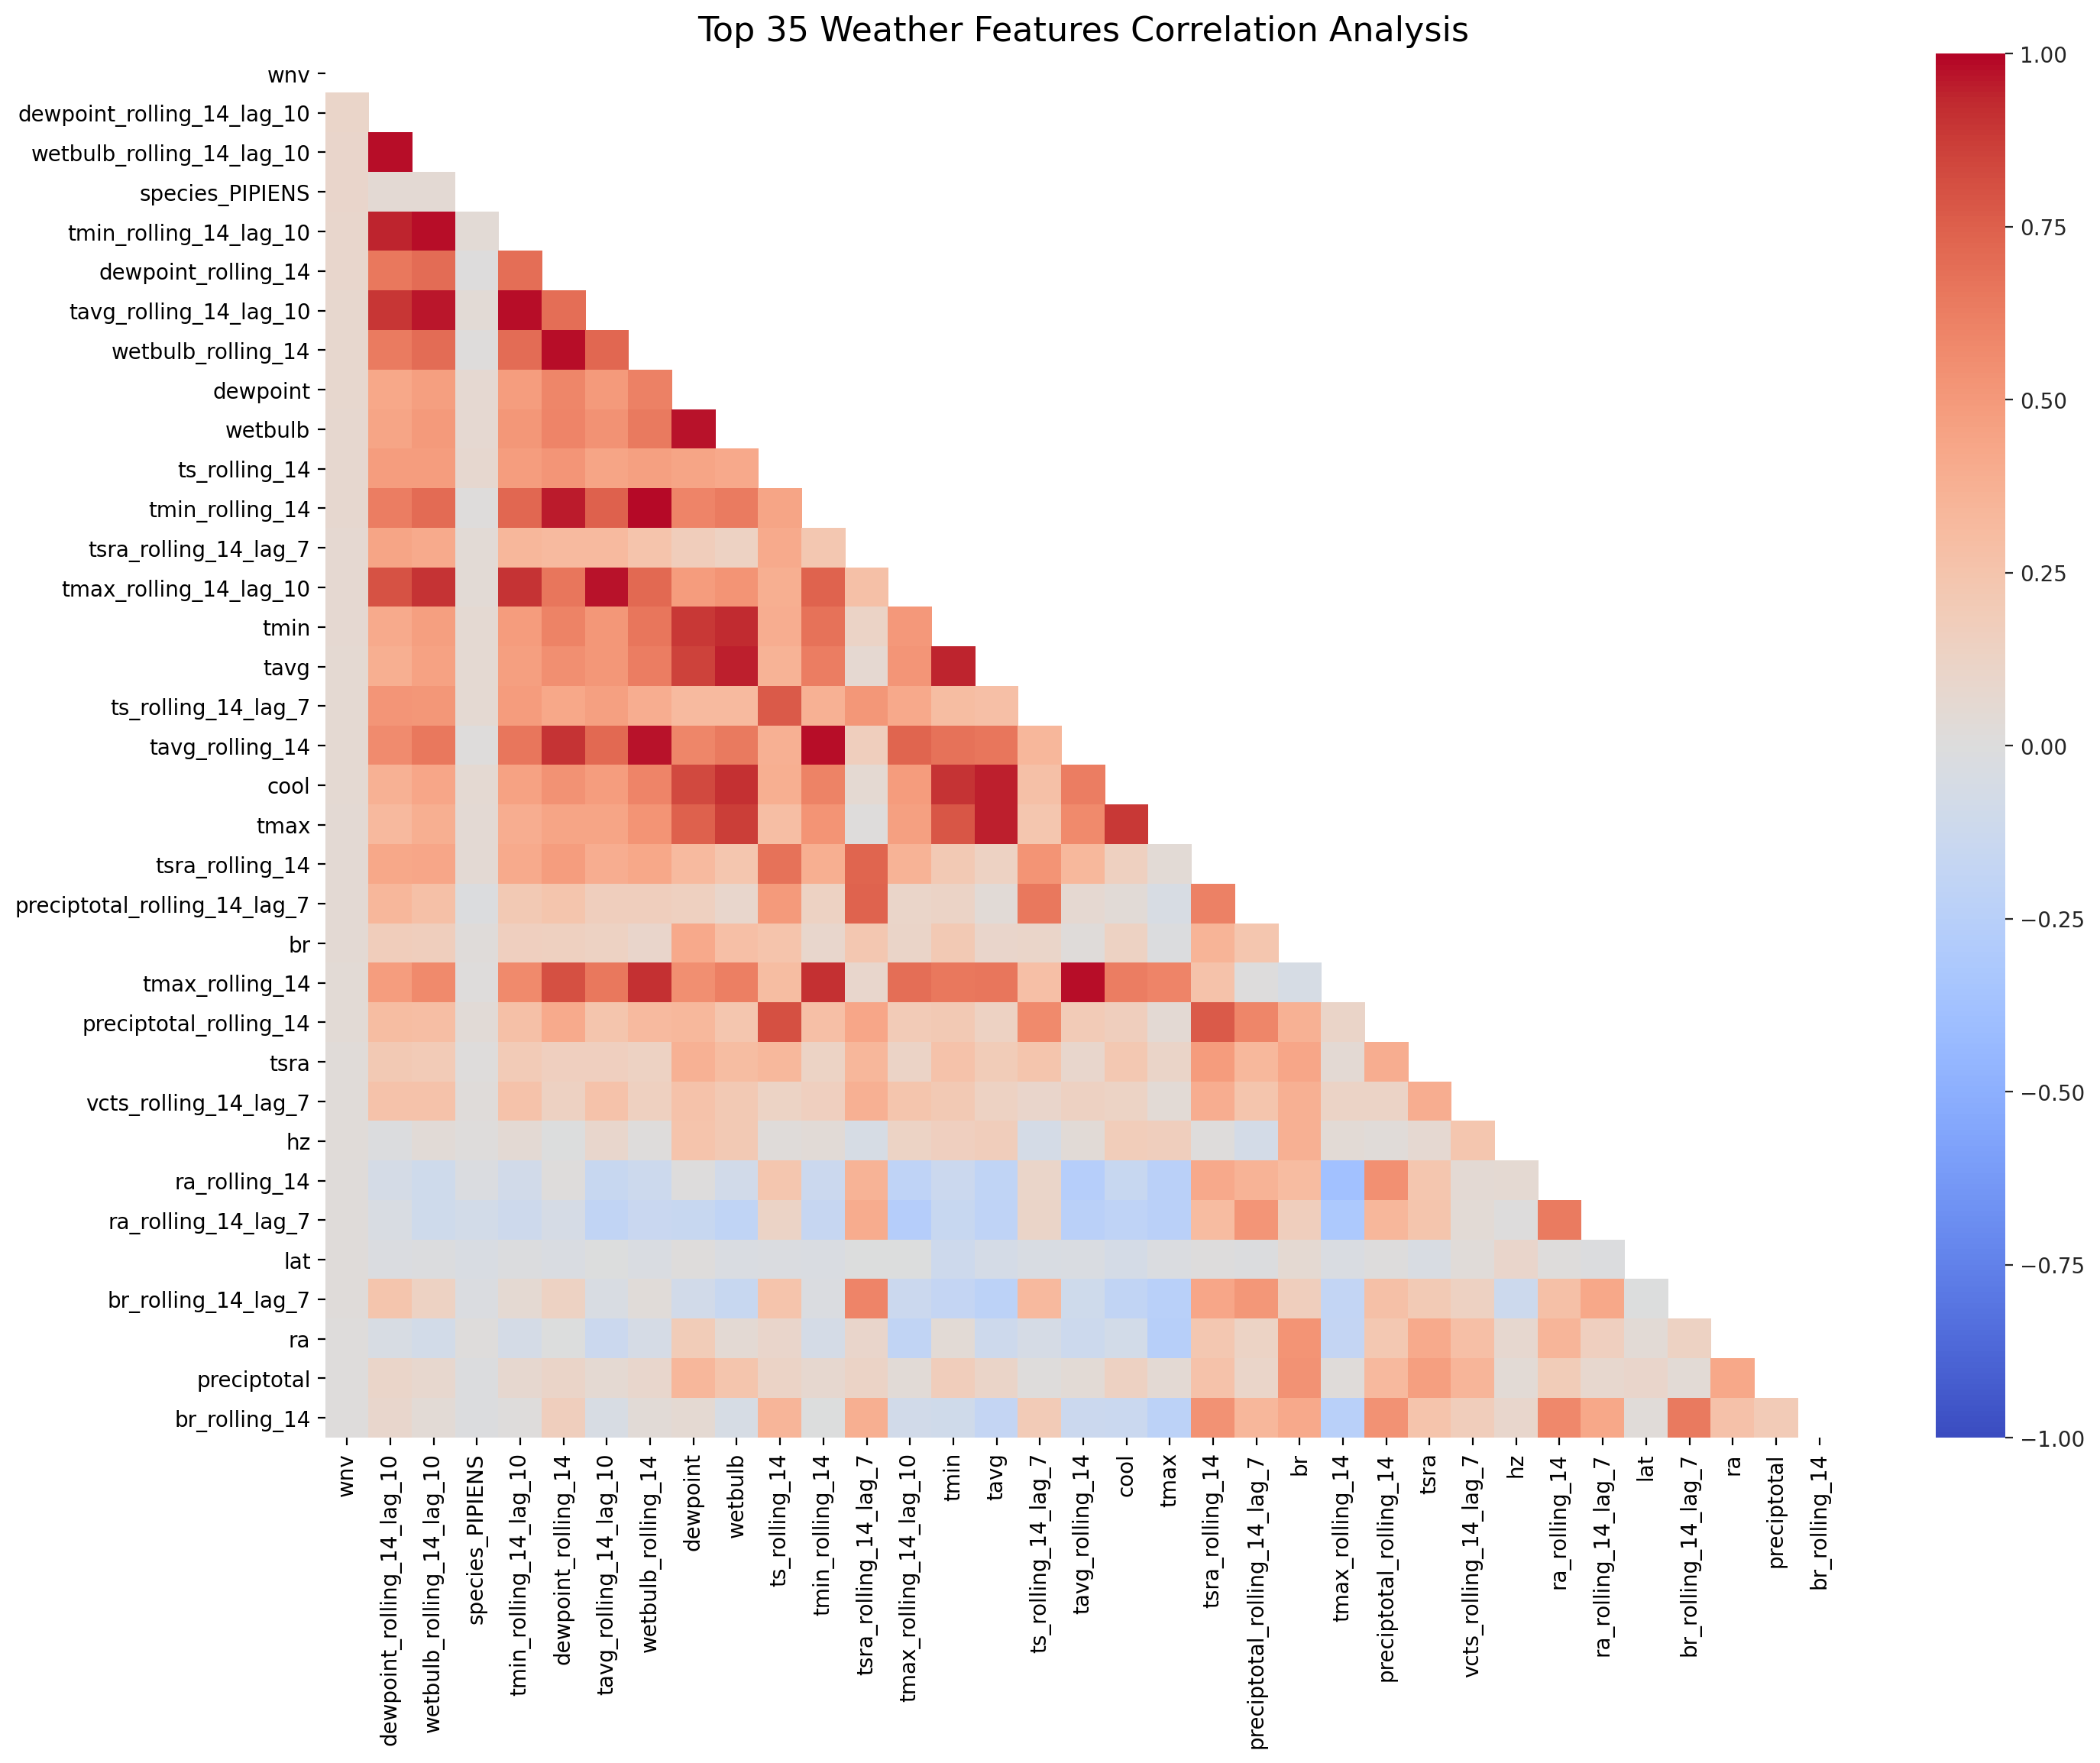

In [5]:
plt.figure(figsize=(16,12), dpi=200)
plt.title("Top 35 Weather Features Correlation Analysis", fontsize=16)

matrix = np.triu(train_weather[heatmap_top_35].corr())

with sns.axes_style("white"):
    sns.heatmap(train_weather[heatmap_top_35].corr(), vmin=-1, vmax=1, center=0, linecolor='black', cmap="coolwarm", annot=False, mask=matrix)
    
plt.show()

In [6]:
train_weather.corr().sort_values("wnv", ascending=False)['wnv'].head(55)

wnv                             1.000000
dewpoint_rolling_14_lag_10      0.103517
wetbulb_rolling_14_lag_10       0.100037
species_PIPIENS                 0.094056
tmin_rolling_14_lag_10          0.088623
dewpoint_rolling_14             0.088508
tavg_rolling_14_lag_10          0.081336
wetbulb_rolling_14              0.080345
dewpoint                        0.079021
wetbulb                         0.076981
ts_rolling_14                   0.075088
tmin_rolling_14                 0.073338
tsra_rolling_14_lag_7           0.068795
tmax_rolling_14_lag_10          0.068427
tmin                            0.065335
tavg                            0.061803
ts_rolling_14_lag_7             0.061681
tavg_rolling_14                 0.060466
cool                            0.057631
tmax                            0.051356
tsra_rolling_14                 0.048937
preciptotal_rolling_14_lag_7    0.047703
br                              0.047005
tmax_rolling_14                 0.044551
preciptotal_roll

After initial modelling, we found that the temperature-related features were the most correlated with one another. This is expected as the average temperature of each day is dependent on the minimum and maximum temperatures. 

The correlation heatmap also shows that applying time series functions such as the rolling average and time lags increases the correlation coefficient between the weather features and the WNV. 

Rolling = 14, lag = 10: 
- Dewpoint (0.0790 increased to 0.1035) 
- Wetbulb (0.0770 increased to 0.1000)
- Tavg (0.0618 increased to 0.0813)

Rolling = 14, lag = 7 
- PrecipTotal (0.0139 increased to 0.0477) 

An interesting observation was noted with the negative correlation between the average wind speed and the WNV. This suggests that lower wind speeds are associated with higher counts of WNV. 

We investigate these features further below. 

#### Mosquito Species Count 

In [7]:
species_df = train[["Species", "NumMosquitos", "WnvPresent"]].groupby("Species").sum()
species_df["% WnvPresent"] = (species_df["WnvPresent"] / species_df["NumMosquitos"]) * 100
species_df

,NumMosquitos,WnvPresent,% WnvPresent
Species,,,
CULEX ERRATICUS,7,0,0.000000
CULEX PIPIENS,44671,240,0.537261
CULEX PIPIENS/RESTUANS,66268,262,0.395364
CULEX RESTUANS,23431,49,0.209125
CULEX SALINARIUS,145,0,0.000000
CULEX TARSALIS,7,0,0.000000
CULEX TERRITANS,510,0,0.000000


In [8]:
species_df['NumMosquitos']

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

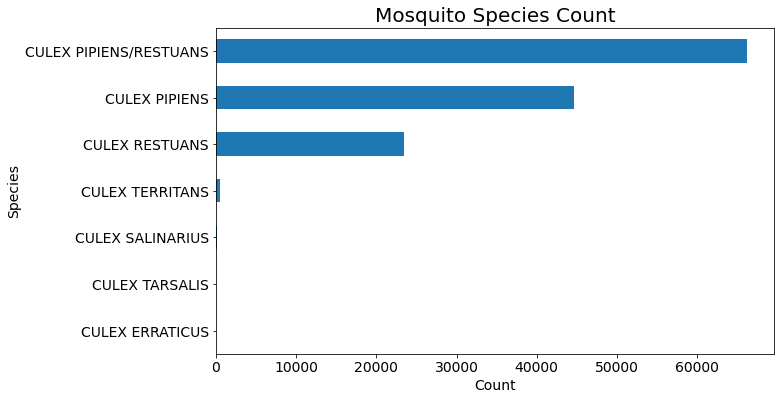

In [9]:
plt.figure(figsize=(10,6))

species_df['NumMosquitos'].sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tick_params(labelsize=14)
plt.title("Mosquito Species Count", fontsize=20);

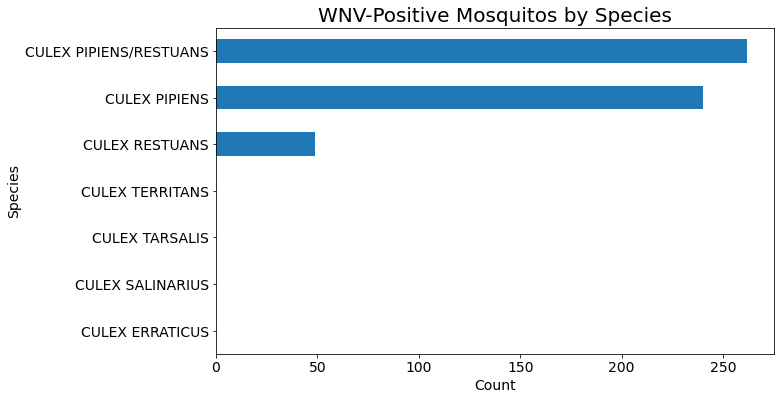

In [10]:
plt.figure(figsize=(10,6))

species_df['WnvPresent'].sort_values(ascending=True).plot(kind='barh')

plt.xlabel("Count", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tick_params(labelsize=14)
plt.title("WNV-Positive Mosquitos by Species", fontsize=20);

From the above 2 plots, we see that although we have 7 species of mosquitoes listed, only 3 of them carry the West Nile Virus (WNV) - namely Culex Pipiens/Restuans, Culex Pipiens and Culex Restuans. Incidentally, these were also the species which had the highest mosquito count by numbers. 

The remaining 4 species were present in much smaller numbers (510 or less). Given that the WNV is present in 0.21% - 0.54% of mosquitoes (1 in at least 500 mosquitoes), it does make sense that these species had 0 counts of WNV-carrying mosquitoes. 

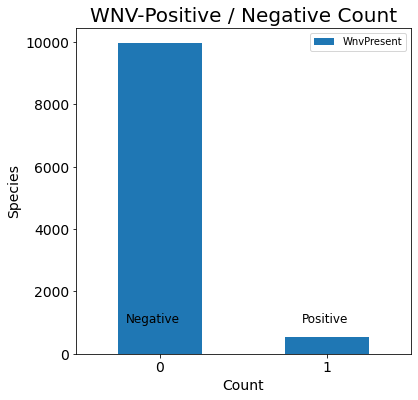

In [11]:
plt.figure(figsize=(6,6))

train["WnvPresent"].value_counts().plot(kind='bar')

plt.xlabel("Count", fontsize=14)
plt.ylabel("Species", fontsize=14)
plt.tick_params(labelsize=14, labelrotation=0)
plt.text(x = 0.85, y=1000, s="Positive", fontsize=12)
plt.text(x = -0.2, y=1000, s="Negative", fontsize=12)
plt.legend()
plt.title("WNV-Positive / Negative Count", fontsize=20);

In [12]:
# Percentage of mosquitoes with WNV 
(species_df['WnvPresent'].sum()/species_df['NumMosquitos'].sum()) * 100

0.40803027273602444

With only 0.41% of the total mosquitoes carrying the WNV, we do note that our classes are imbalanced, and techniques will be implemented in a later section to handle this imbalance. 

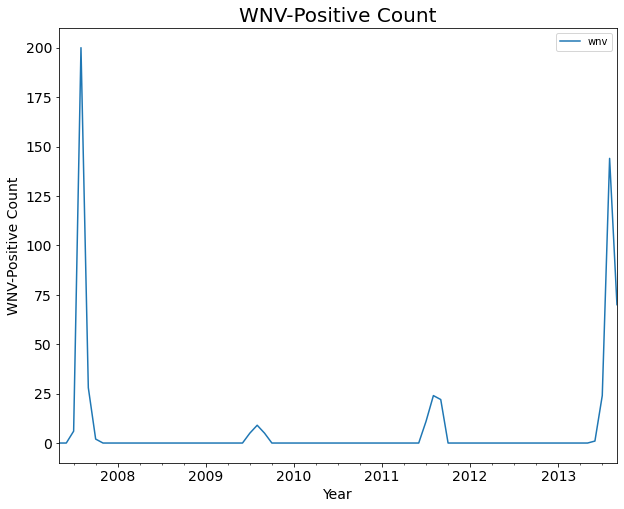

In [13]:
plt.figure(figsize=(10, 8))
df_train["wnv"].resample('M').sum().plot();

plt.xlabel("Year", fontsize=14)
plt.ylabel("WNV-Positive Count", fontsize=14)
plt.tick_params(labelsize=14, labelrotation=0)
# plt.xticks(["Q1", "Q2", "Q3", "Q4"])

plt.legend()
plt.title("WNV-Positive Count", fontsize=20);

In [14]:
df_train['wnv'].groupby(df_train.index.year).sum()

date
2007    236
2009     19
2011     57
2013    239
Name: wnv, dtype: int64

<ipython-input-15-9f412a507616>:21: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_07_09[i]]['long'],
<ipython-input-15-9f412a507616>:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y=df_train.loc[df_train['wnv'] >= 1][dates_07_09[i]]['lat'], c='r', s=1, label='wnv')
<ipython-input-15-9f412a507616>:21: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_07_09[i]]['long'],
<ipython-inpu

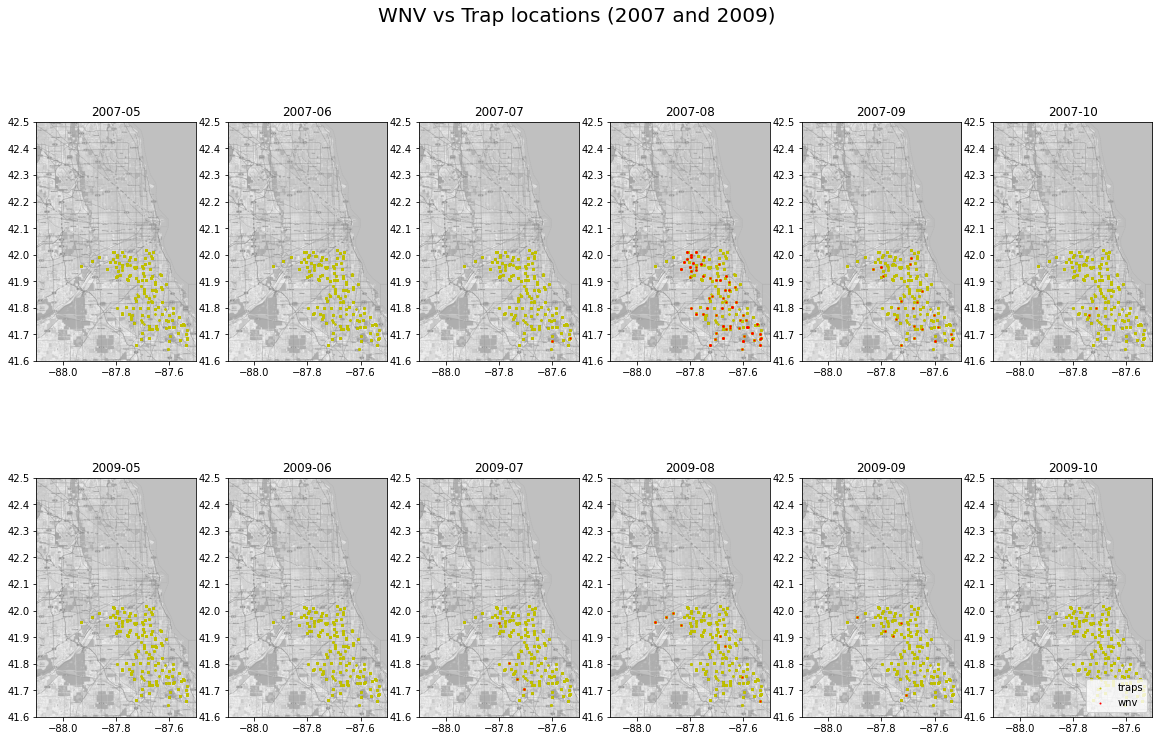

In [15]:
# Plot locations of WNV versus trap locations
origin = [41.6, -88.1]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

# Train dates
dates_07_09 = ['2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10',
               '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10']

# Generate plots
plt.figure(figsize=(20,12))
for i in range(len(dates_07_09)):
    plt.subplot(2,6,i+1)
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=df_train['long'],
                y=df_train['lat'], c='y', s=1, label='traps')
    plt.title(dates_07_09[i])
    
    try:
        plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_07_09[i]]['long'],
                    y=df_train.loc[df_train['wnv'] >= 1][dates_07_09[i]]['lat'], c='r', s=1, label='wnv')
    except:
        None

plt.suptitle('WNV vs Trap locations (2007 and 2009)', fontsize=20)
plt.legend(loc='lower right');

<ipython-input-16-7e9ca7293d5e>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_11_13[i]]['long'],
<ipython-input-16-7e9ca7293d5e>:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y=df_train.loc[df_train['wnv'] >= 1][dates_11_13[i]]['lat'], c='r', s=1, label='wnv')
<ipython-input-16-7e9ca7293d5e>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_11_13[i]]['long'],
<ipython-inpu

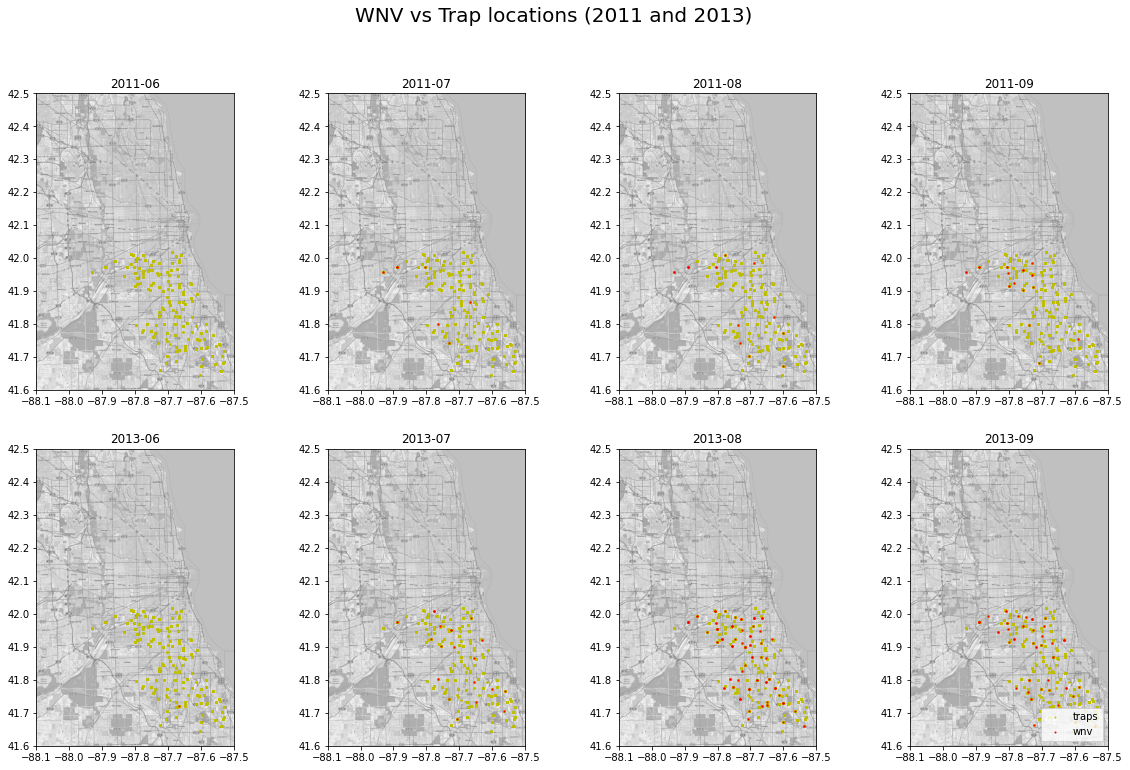

In [16]:
dates_11_13 = ['2011-06', '2011-07', '2011-08', '2011-09',
               '2013-06', '2013-07', '2013-08', '2013-09']

# Generate plots
plt.figure(figsize=(20,12))
for i in range(len(dates_11_13)):
    plt.subplot(2,4,i+1)
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=df_train['long'],
                y=df_train['lat'], c='y', s=1, label='traps')
    plt.title(dates_11_13[i])
    
    try:
        plt.scatter(x=df_train.loc[df_train['wnv'] >= 1][dates_11_13[i]]['long'],
                    y=df_train.loc[df_train['wnv'] >= 1][dates_11_13[i]]['lat'], c='r', s=1, label='wnv')
    except:
        None

plt.suptitle('WNV vs Trap locations (2011 and 2013)', fontsize=20)
plt.legend(loc='lower right');

The dataset only contains information on the years 2007, 2009, 2011 and 2013 - so the subsequent sections will only be considering these 4 years. 

This section explores the main climate-related features identified by <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/">prior scientific research</a> to have an impact on the WNV transmissions. 

In these 5 plots, we found that plotting the rolling 14-day average with varying lags for the different features offered the greatest insights. 

In [17]:
# Function to include legend for each plot
def show_legend(axes1, axes2):
    lines_1, labels_1 = axes1.get_legend_handles_labels()
    lines_2, labels_2 = axes2.get_legend_handles_labels()
    lines = lines_1 + lines_2
    labels = labels_1 + labels_2
    return axes1.legend(lines, labels, loc='best')

#### Temperature & WNV-Positive Counts by Year 

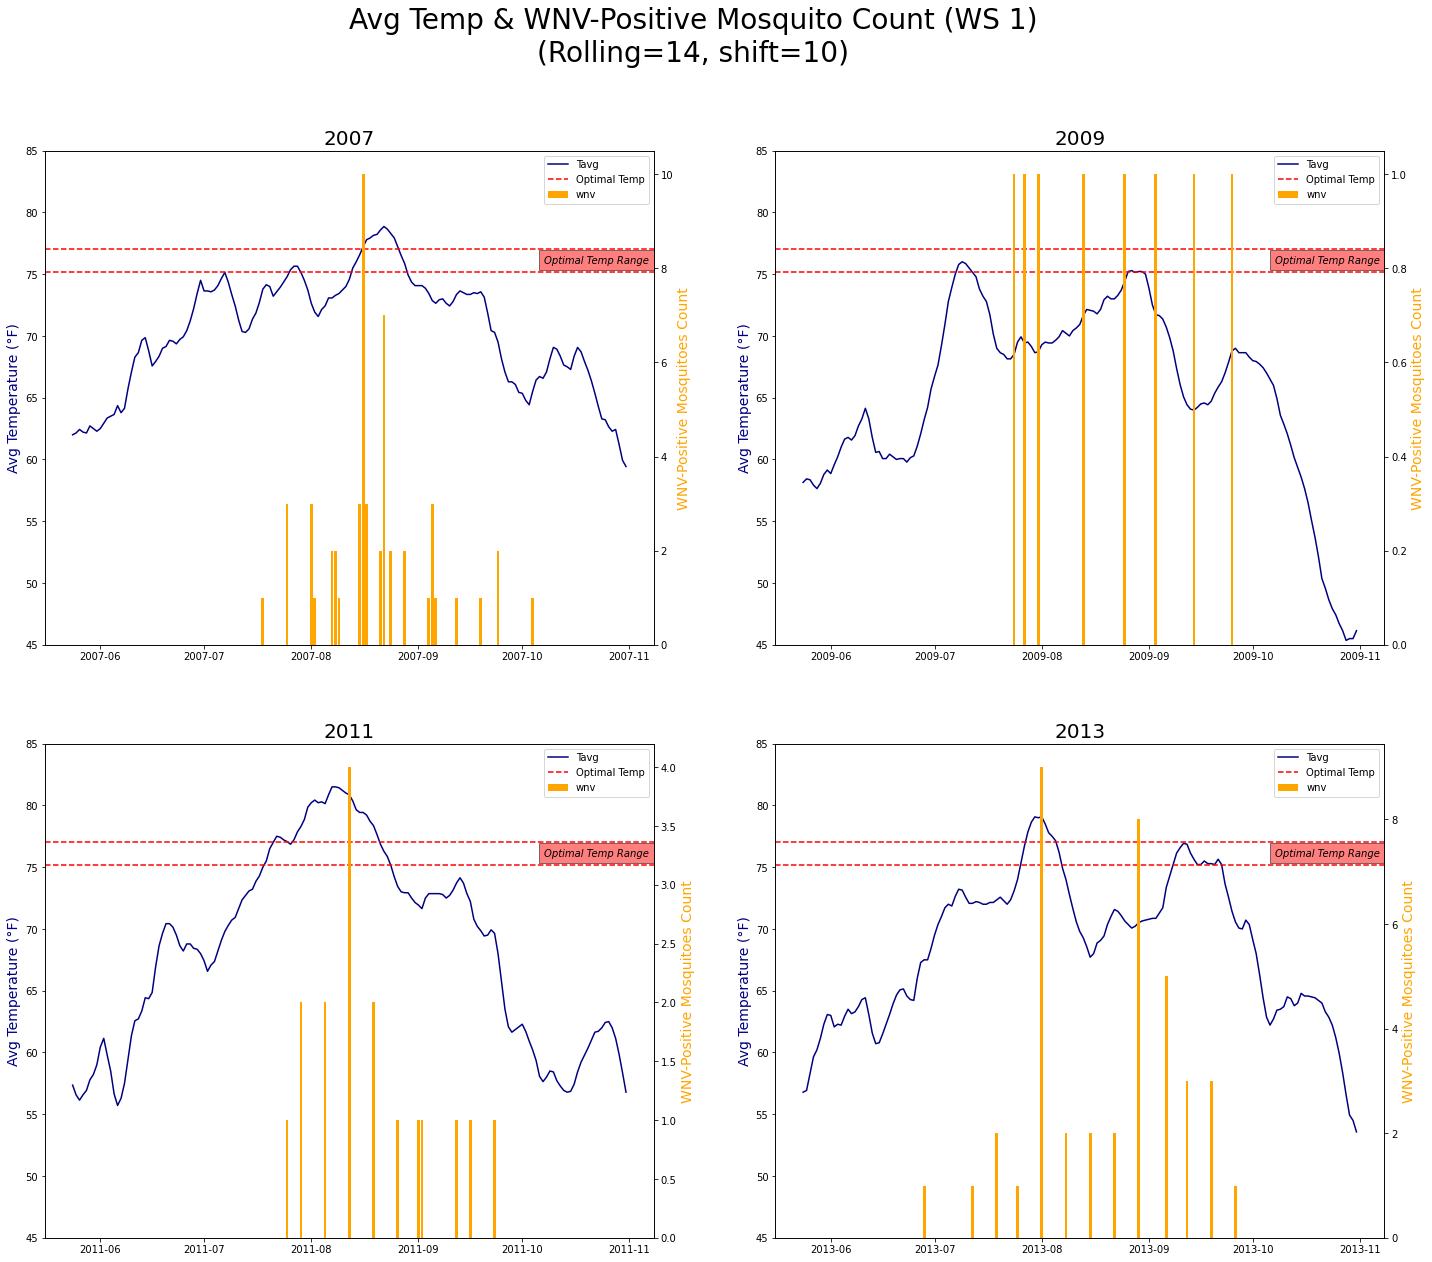

In [18]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s1[weather_s1.index.year == year]['tavg'].rolling(14).mean().shift(10), c="navy", label='Tavg')
    ax1.set_ylabel("Avg Temperature (°F)", fontsize=14, color='navy')
    ax1.text(0.82, 0.772, 'Optimal Temp Range',style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5}, transform= ax1.transAxes)
    ax1.axhline(y=75.2, color='red', linestyle='--', label='Optimal Temp')
    ax1.axhline(y=77, color='red', linestyle='--')
  
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    ax1.set_ylim(45, 85)
    show_legend(ax1, ax2)

plt.suptitle("Avg Temp & WNV-Positive Mosquito Count (WS 1)\n(Rolling=14, shift=10)", fontsize=28,va ='top')
plt.show()

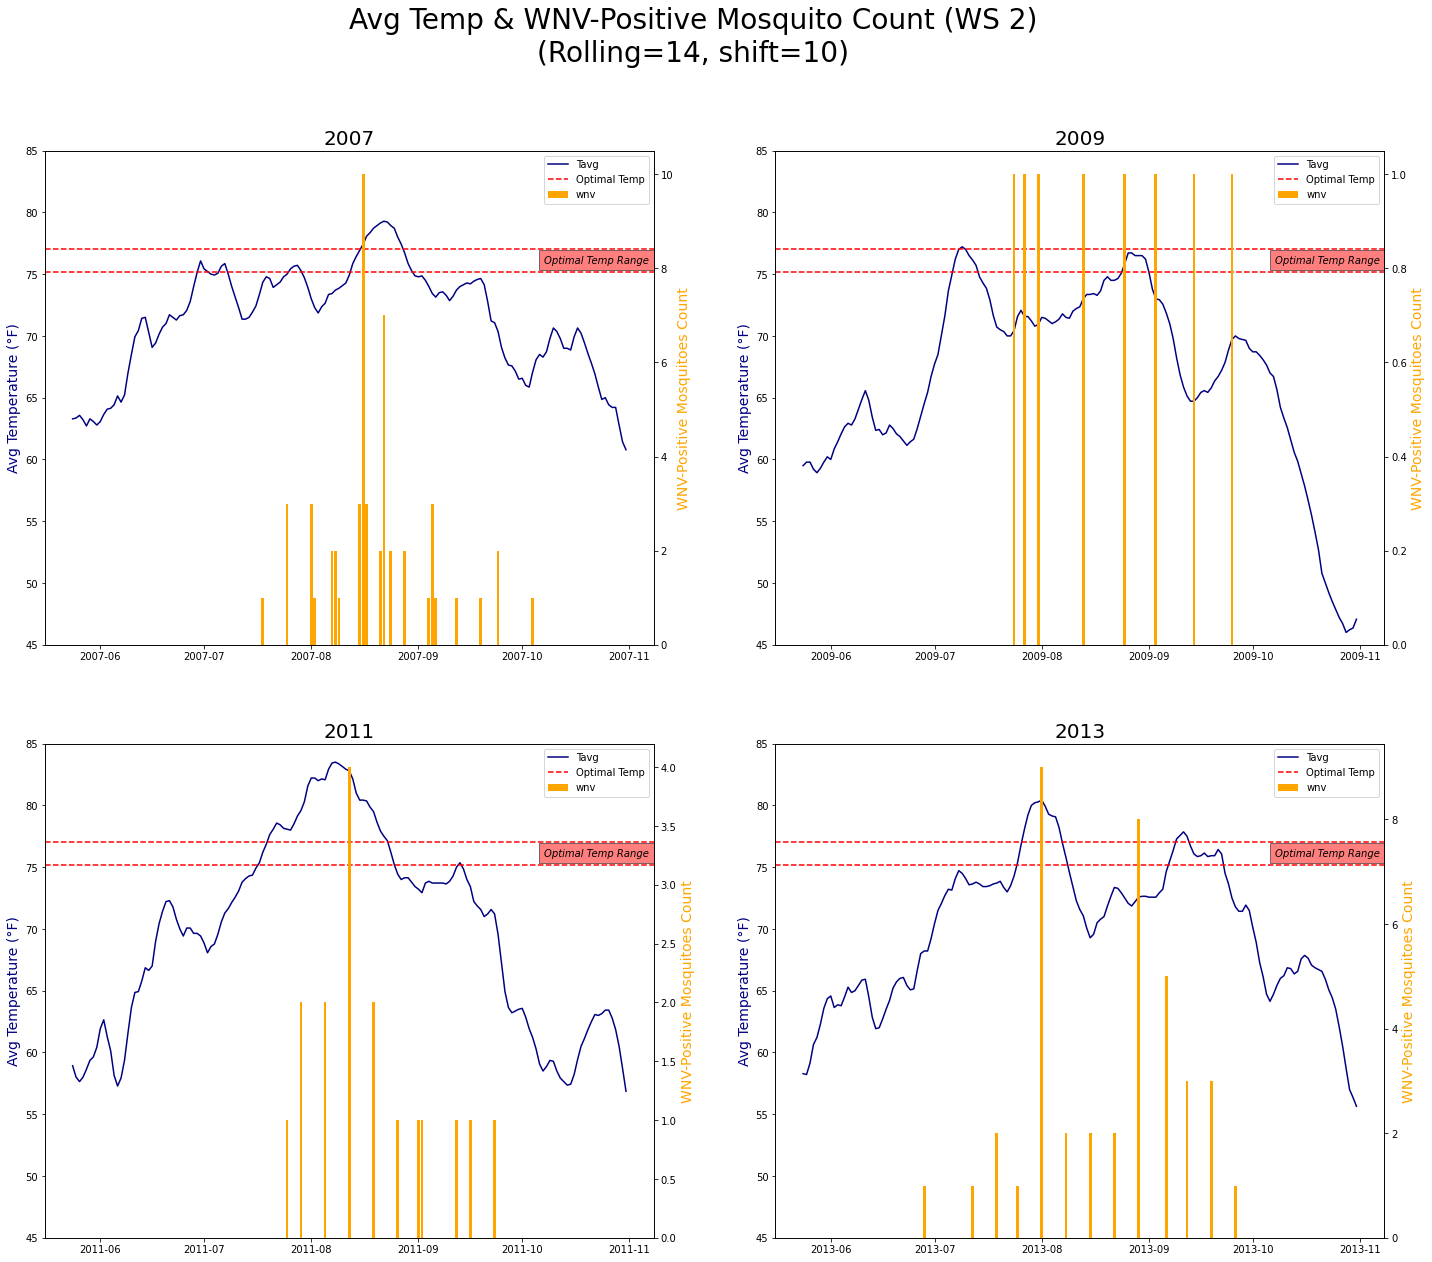

In [19]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20) 
    ax1.plot(weather_s2[weather_s2.index.year == year]['tavg'].rolling(14).mean().shift(10), c="navy", label='Tavg')
    ax1.set_ylabel("Avg Temperature (°F)", fontsize=14, color='navy')
    ax1.text(0.82, 0.772, 'Optimal Temp Range',style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5}, transform= ax1.transAxes)
    ax1.axhline(y=75.2, color='red', linestyle='--', label='Optimal Temp')
    ax1.axhline(y=77, color='red', linestyle='--')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    ax1.set_ylim(45, 85)
    show_legend(ax1, ax2)

plt.suptitle("Avg Temp & WNV-Positive Mosquito Count (WS 2)\n(Rolling=14, shift=10)", fontsize=28,va ='top')
plt.show()

The temperature charts reveal some pattern between the counts of WNV-positive mosquitoes, most notably within the 7 days after the day of the temperature. 

External <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6164257/">research</a> conducted explains this phenomenon as the temperature has an impact on these 3 factors: 
- Mosquito reproduction rate 
- Mosquito biting rate 
- Virus replication rate 

In addition, recent findings have revealed the <a href = "https://www.sciencedaily.com/releases/2020/09/200915105932.htm#:~:text=Transmission%20of%20West%20Nile%20and%20five%20other%20temperate%20mosquito%2Dborne,C%20and%2026%C2%B0C.">optimal temperatures</a> for WNV to spread - between 75.2 to 77 degrees Fahrenheit. This explains our plots in 2 ways: 

1) Higher temperatures increase mosquito activity and leads to higher occurrences of infections. 

2) Higher temperatures increase mosquito reproduction rate and virus replication rate, which means that once the new batch of mosquitoes hatch, there is a higher likelihood of them being WNV-positive. This is why in 2007 and 2011, each peak in WNV-positive mosquito count is followed by a secondary peak, indicating that temperatures have both an immediate and delayed impact on the WNV-positive mosquito count. 

This coincides with a higher number of WNV-positive mosquitoes during time periods where this temperature was reached (as demarcated by the horizontal red lines). 

#### Dew Point

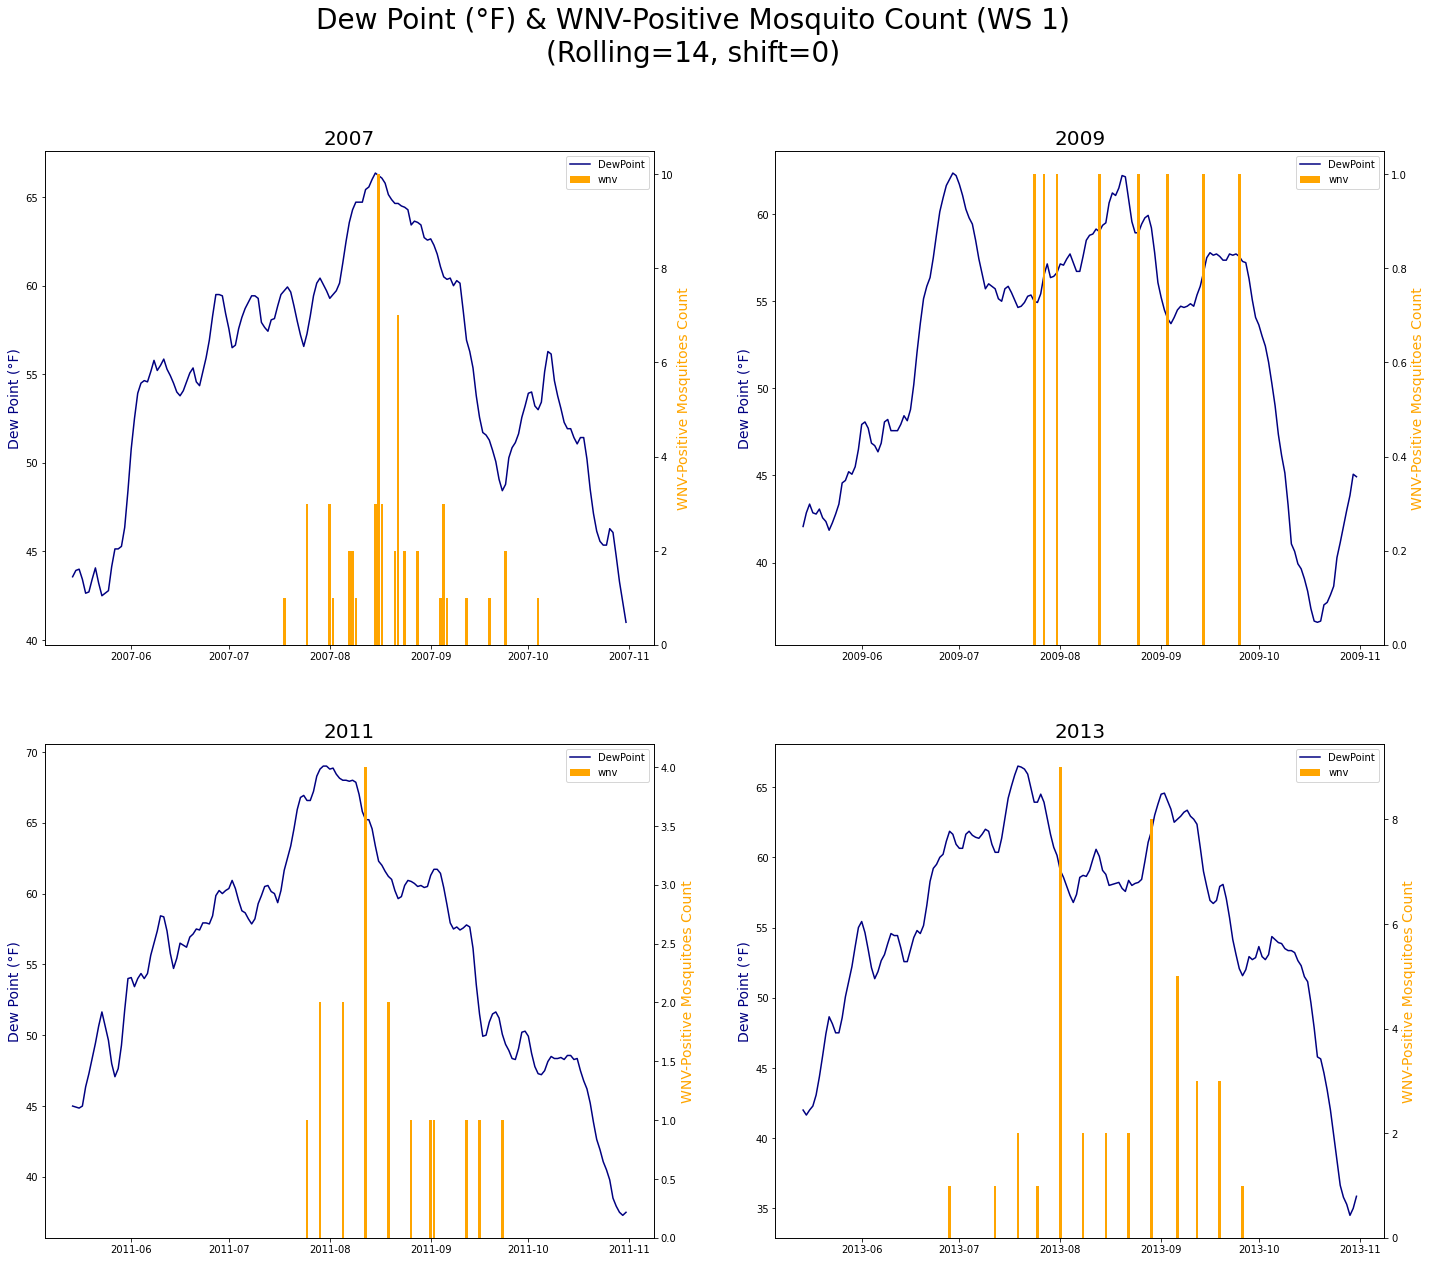

In [20]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s1[weather_s1.index.year == year]['dewpoint'].rolling(14).mean().shift(0), c="navy", label='DewPoint')
    ax1.set_ylabel("Dew Point (°F)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label="wnv")
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Dew Point (°F) & WNV-Positive Mosquito Count (WS 1)\n(Rolling=14, shift=0)", fontsize=28,va ='top')
plt.show()

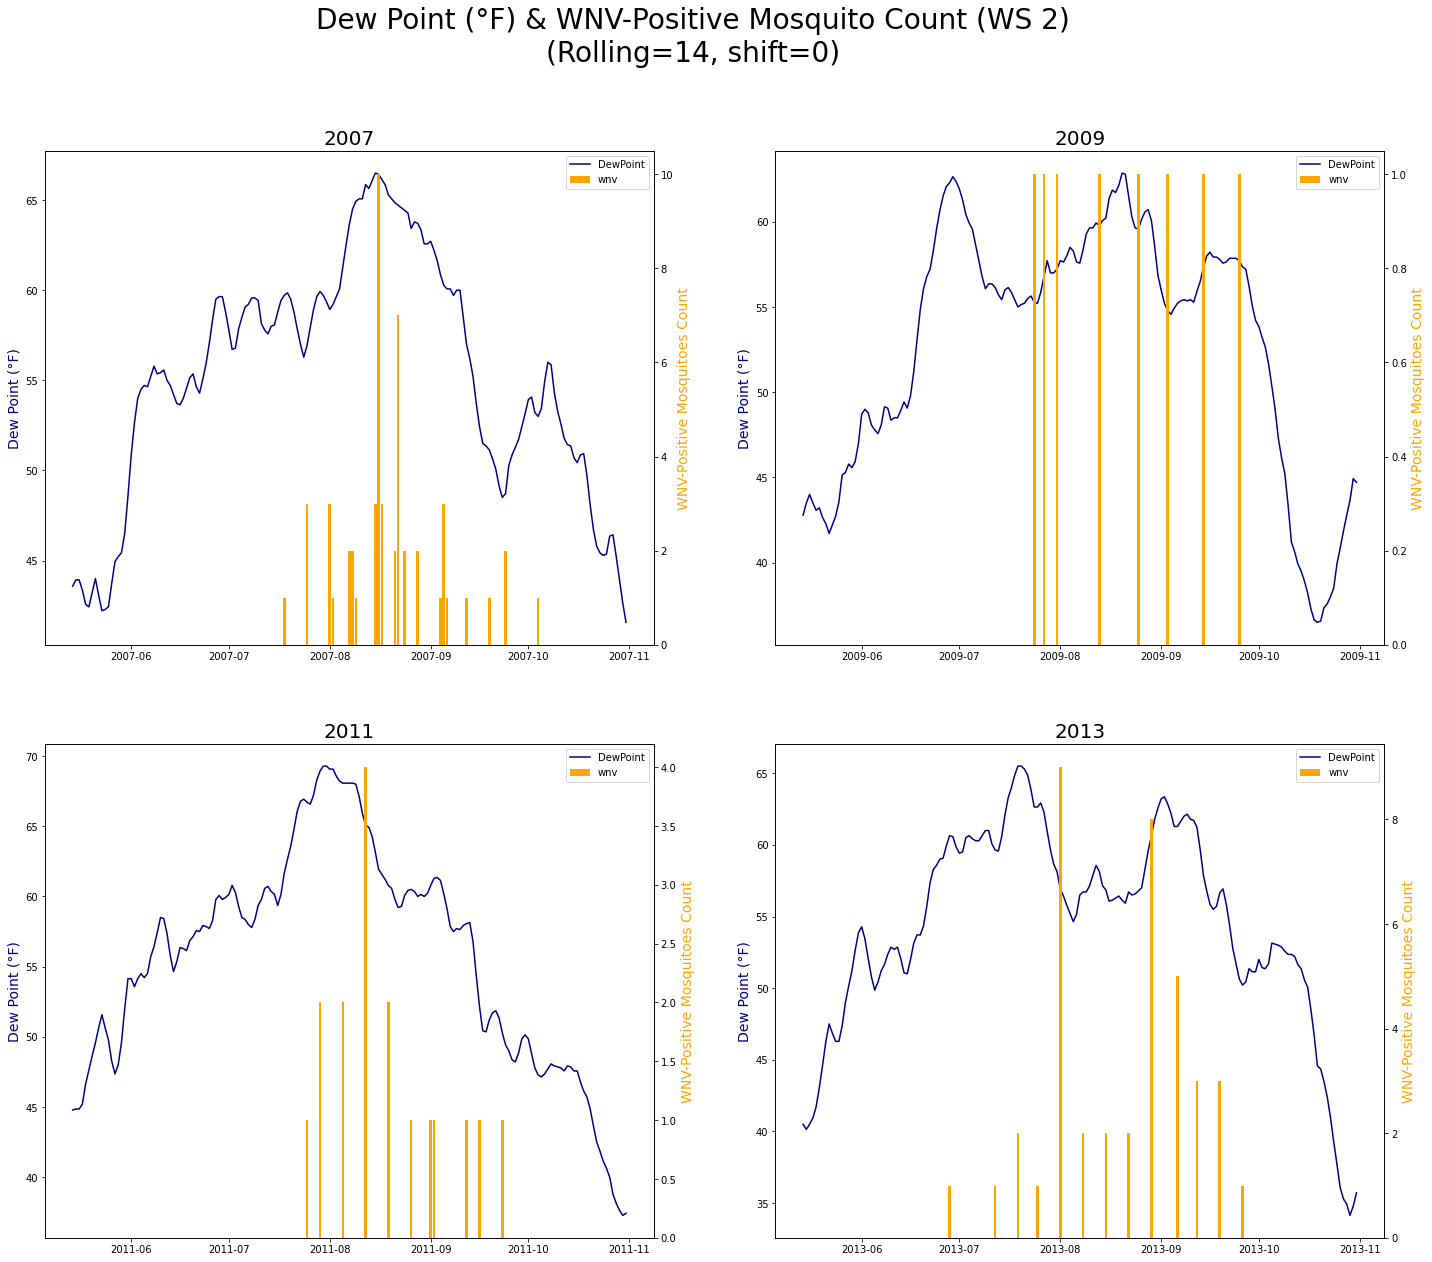

In [21]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s2[weather_s2.index.year == year]['dewpoint'].rolling(14).mean().shift(0), c="navy", label='DewPoint')
    ax1.set_ylabel("Dew Point (°F)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Dew Point (°F) & WNV-Positive Mosquito Count (WS 2)\n(Rolling=14, shift=0)", fontsize=28,va ='top')
plt.show()

As noted from the above plots, the dew point tends to peak between July and September. Generally, higher dew points do result in higher WNV counts. However, we do note that the peaks in 2007 and 2013 did not correspond to the days with the highest WNV counts. 

It is possible that the lower temperatures on those days may have resulted in decreased mosquito activity. 

#### Wet Bulb

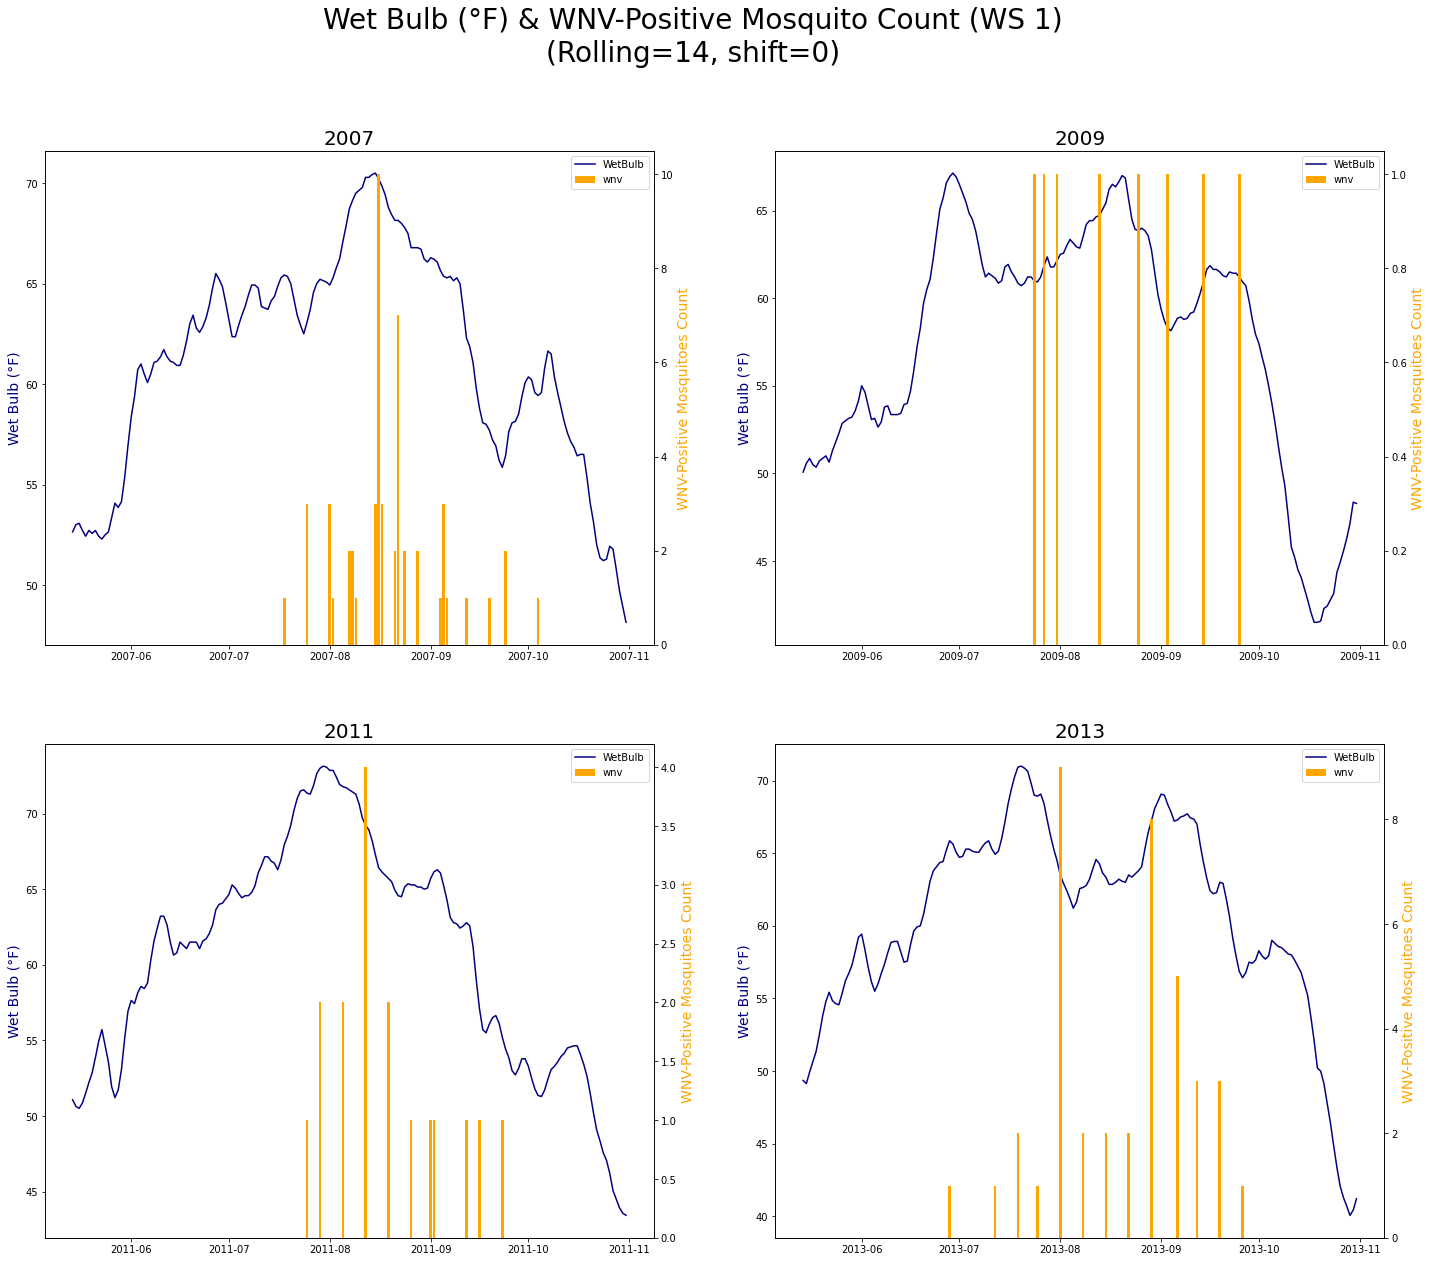

In [22]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]

    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s1[weather_s1.index.year == year]['wetbulb'].rolling(14).mean().shift(0), c="navy", label='WetBulb')
    ax1.set_ylabel("Wet Bulb (°F)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Wet Bulb (°F) & WNV-Positive Mosquito Count (WS 1)\n(Rolling=14, shift=0)", fontsize=28,va ='top')
plt.show()

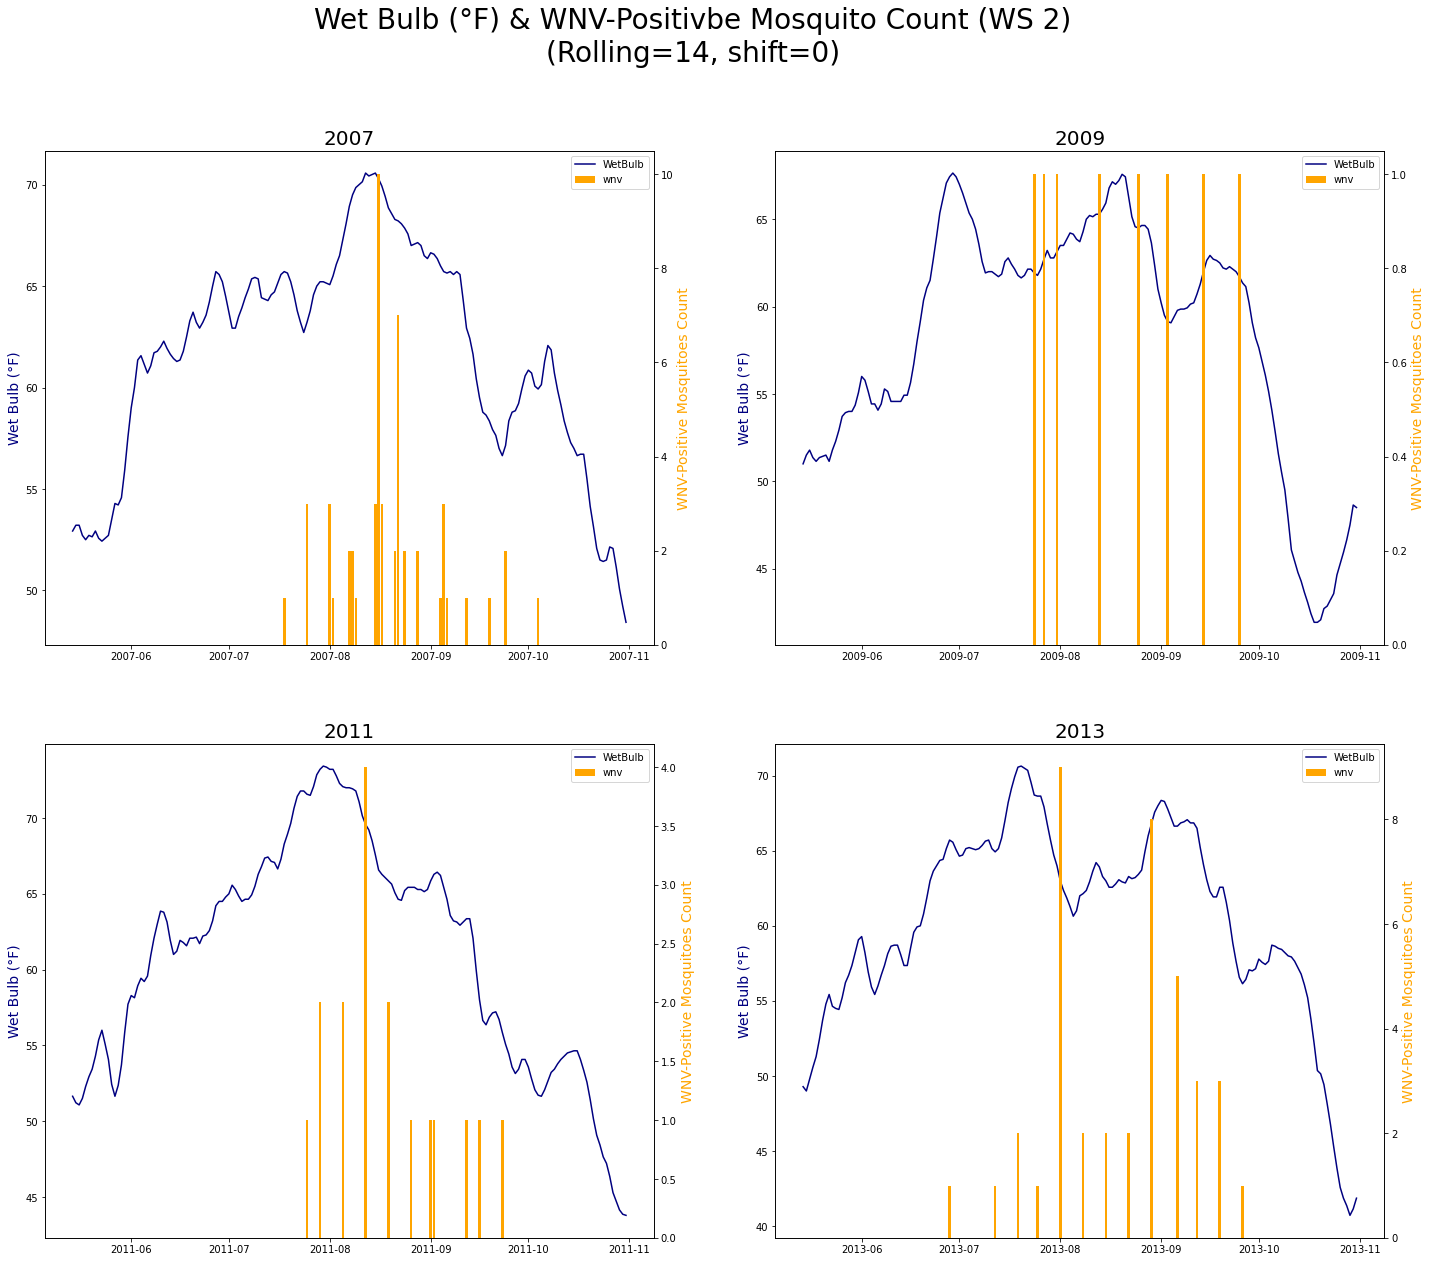

In [23]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s2[weather_s2.index.year == year]['wetbulb'].rolling(14).mean(), c="navy", label='WetBulb')
    ax1.set_ylabel("Wet Bulb (°F)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Wet Bulb (°F) & WNV-Positivbe Mosquito Count (WS 2)\n(Rolling=14, shift=0)", fontsize=28,va ='top')
plt.show()

From the above plots, the wet bulb tends to peak between July and September. Generally, higher wet bulb temperatures are associated with higher levels of humidity, which <a href="https://www.mosquitosquad.com/central-illinois/about-us/blog/2018/july/how-does-weather-affect-mosquito-activity-/">offsets the higher temperatures</a>, and thus results in higher WNV counts. However, we do note that the peaks in 2007 and 2013 did not correspond to the days with the highest WNV counts. 

It is possible that the lower temperatures on those days may have resulted in decreased mosquito activity. 

#### Precip Total

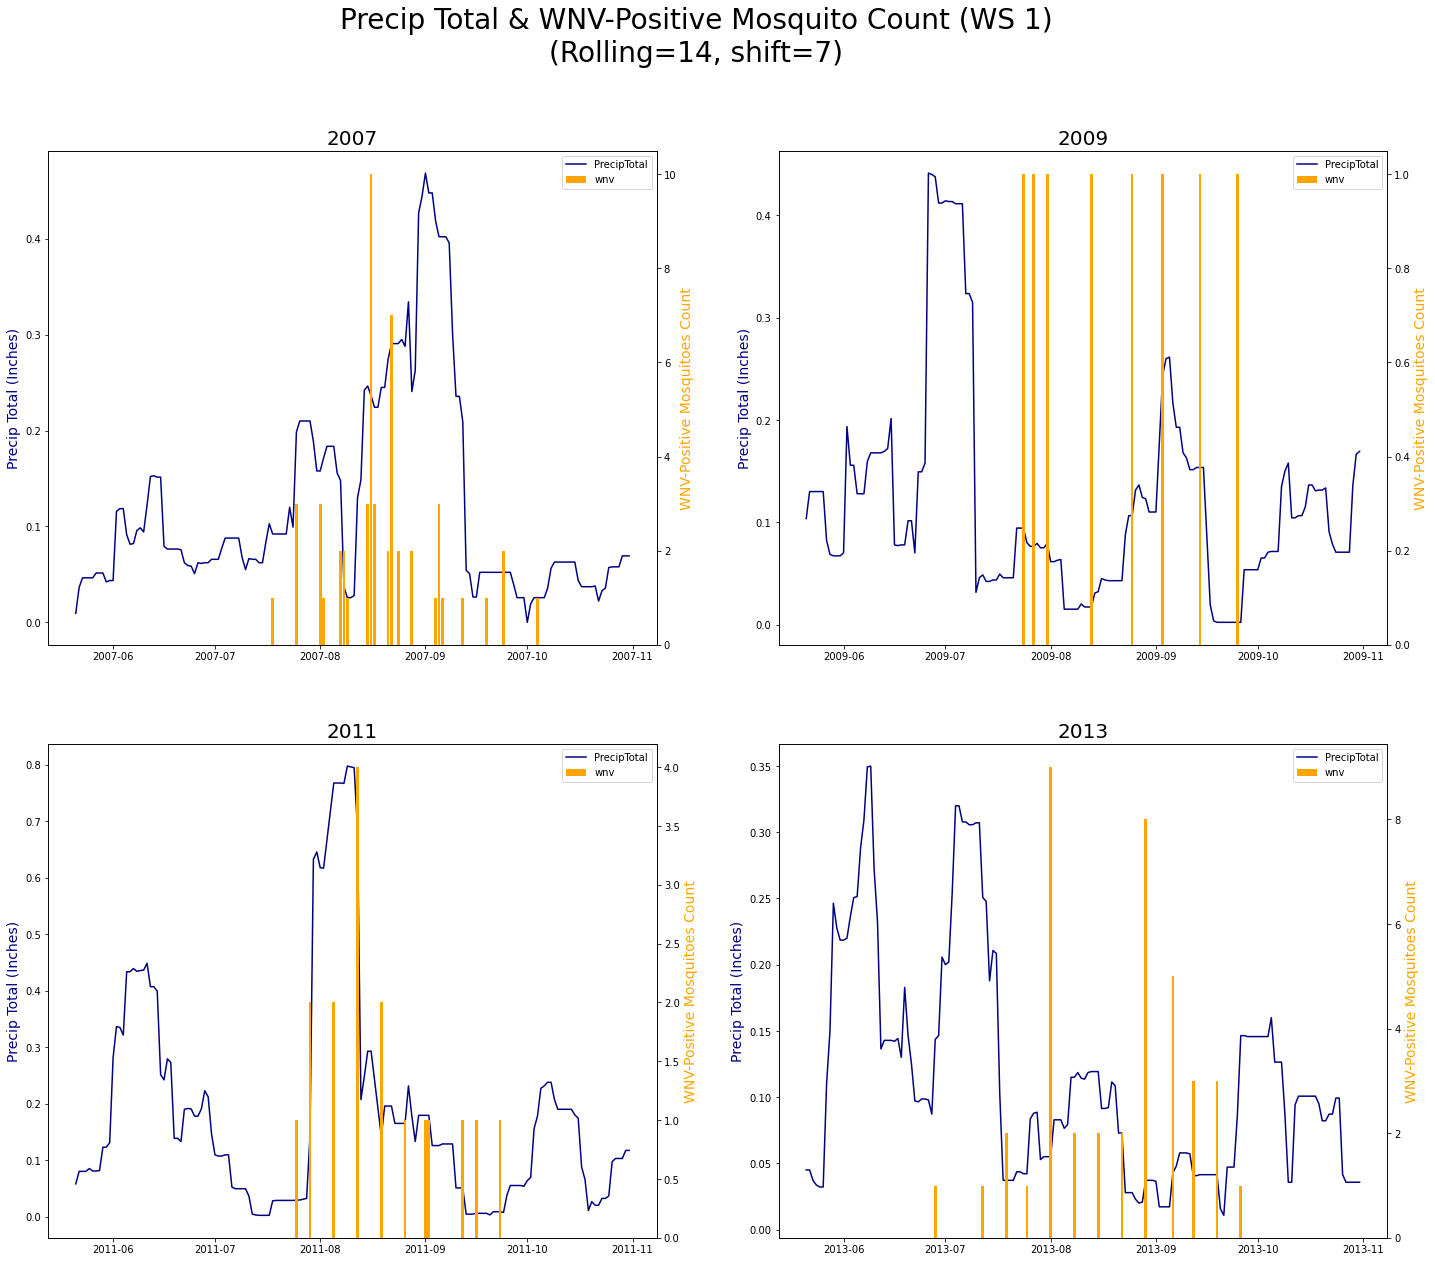

In [24]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s1[weather_s1.index.year == year]['preciptotal'].rolling(14).mean().shift(7), c="navy", label='PrecipTotal')
    ax1.set_ylabel("Precip Total (Inches)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Precip Total & WNV-Positive Mosquito Count (WS 1)\n(Rolling=14, shift=7)", fontsize=28,va ='top')
plt.show()

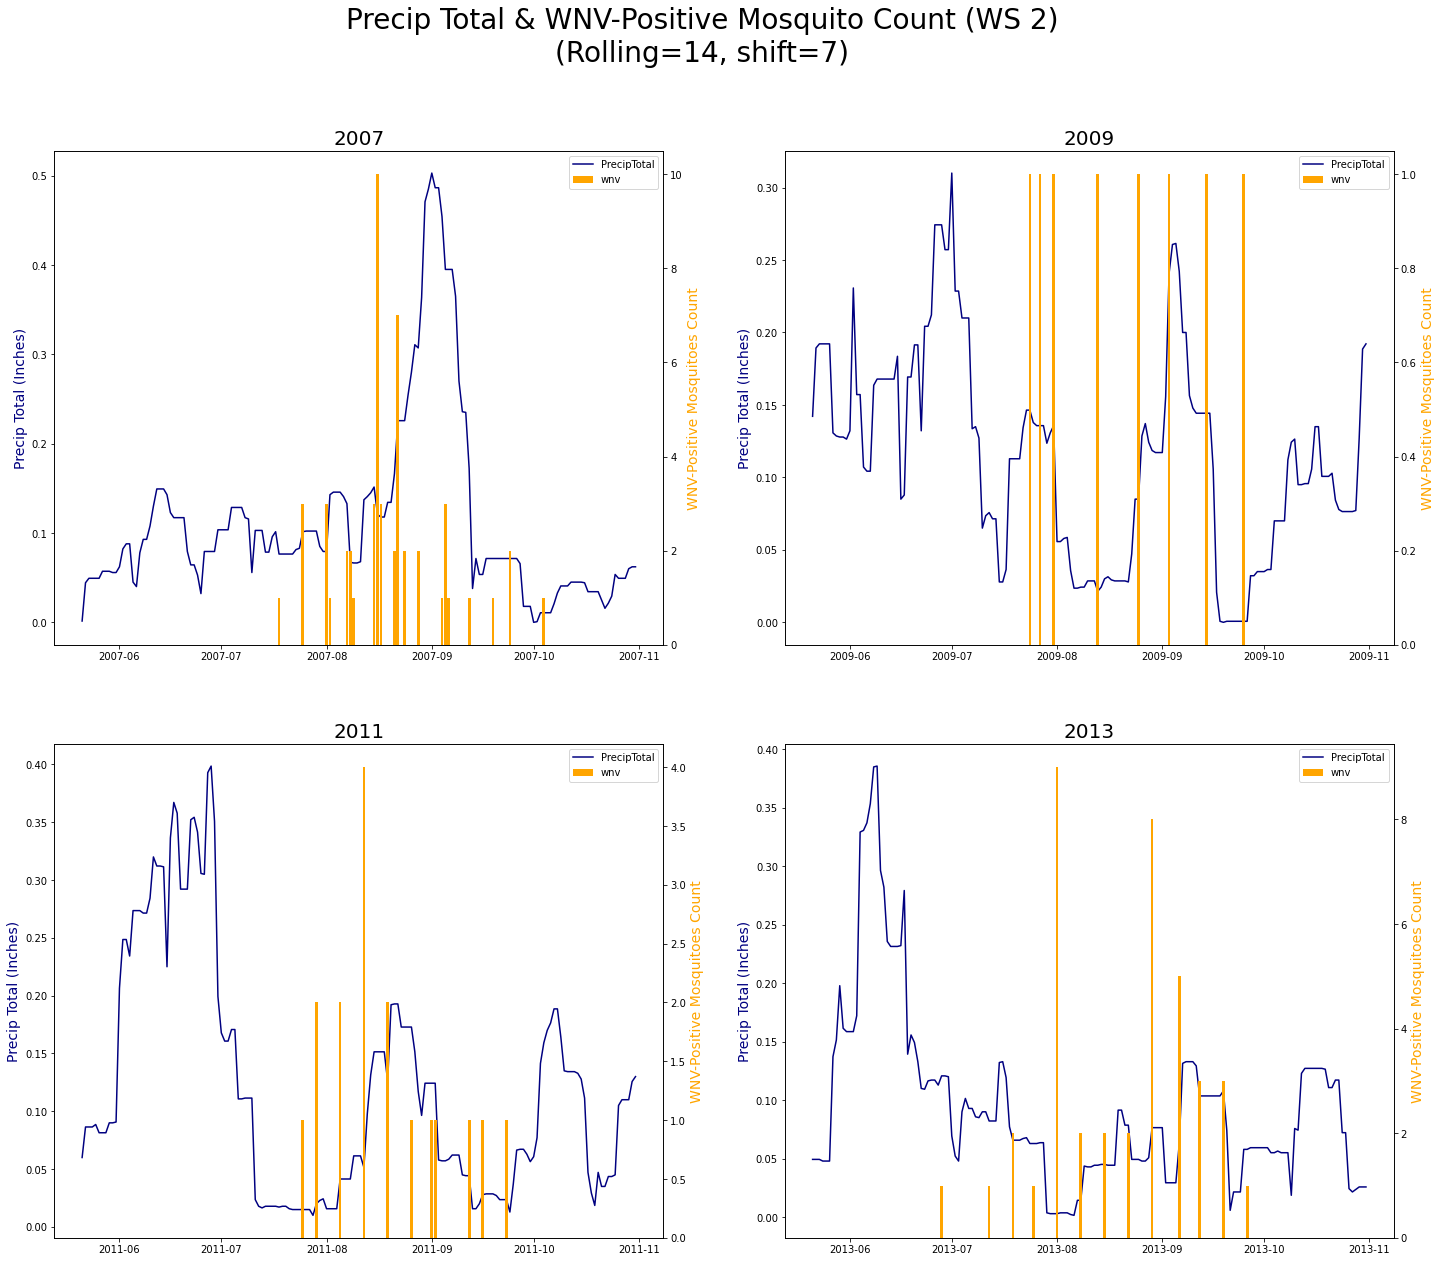

In [25]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(24,20))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s2[weather_s2.index.year == year]['preciptotal'].rolling(14).mean().shift(7), c="navy", label='PrecipTotal')
    ax1.set_ylabel("Precip Total (Inches)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("Precip Total & WNV-Positive Mosquito Count (WS 2)\n(Rolling=14, shift=7)", fontsize=28,va ='top')
plt.show()

The plots above reveal that a 7-day lag time between the precipitation total and the WNV-positive count. Decreasing or law precipitation totals generally reflect an increase in the WNV count. 

Findings from another <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/">research article</a> showed that higher precipitation increases the amount of water surfaces for mosquitoes to breed. This is explained by the spikes in WNV-positive counts after periods of heavy precipitation as shown in the years 2009, 2011 and 2013. 


#### Average Wind Speed

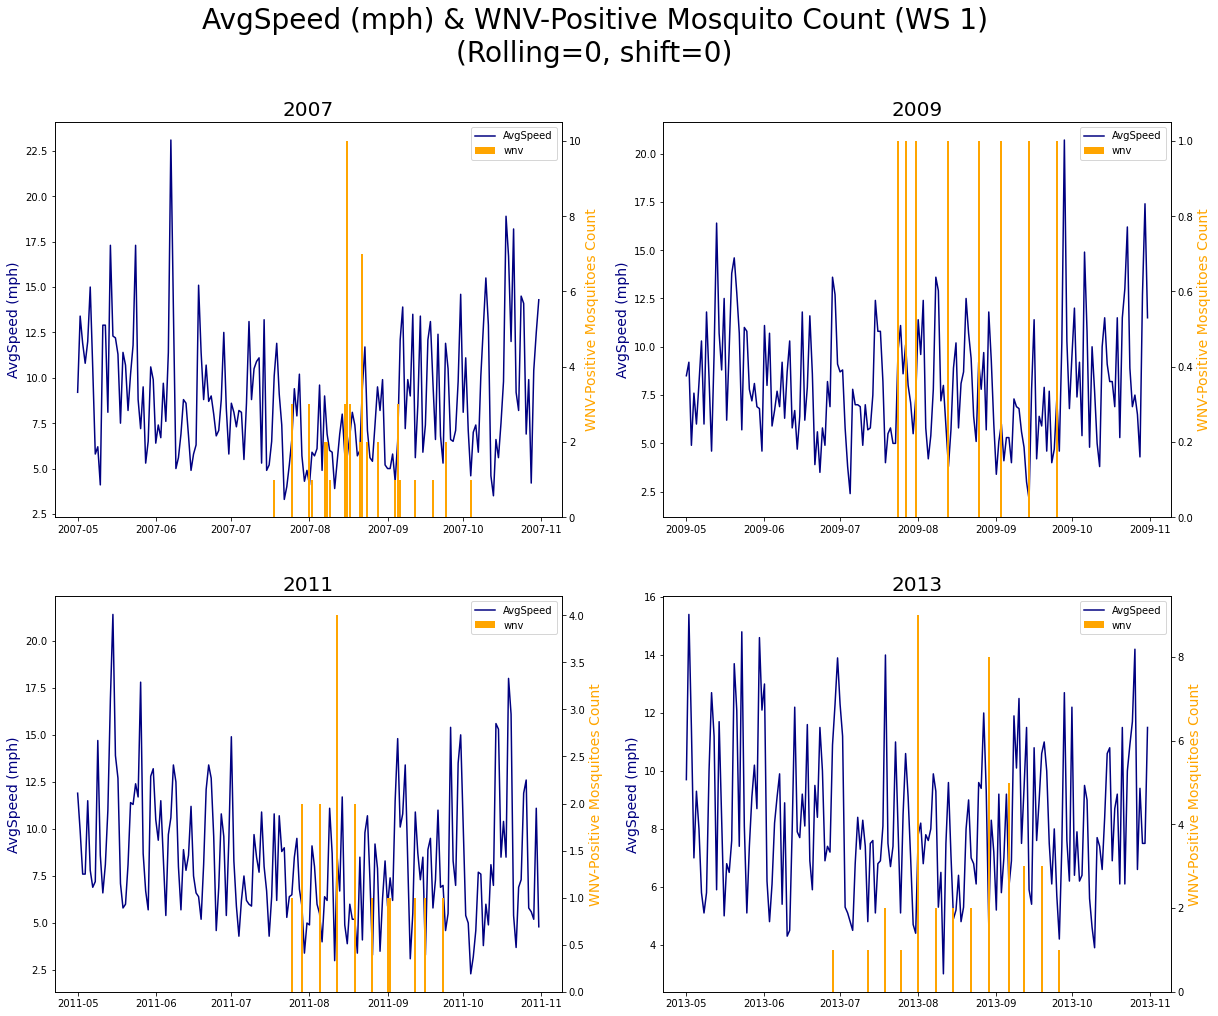

In [26]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(20,16))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s1[weather_s1.index.year == year]['avgspeed'], c="navy", label='AvgSpeed')
    ax1.set_ylabel("AvgSpeed (mph)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)

plt.suptitle("AvgSpeed (mph) & WNV-Positive Mosquito Count (WS 1)\n(Rolling=0, shift=0)", fontsize=28,va ='top')
plt.show()

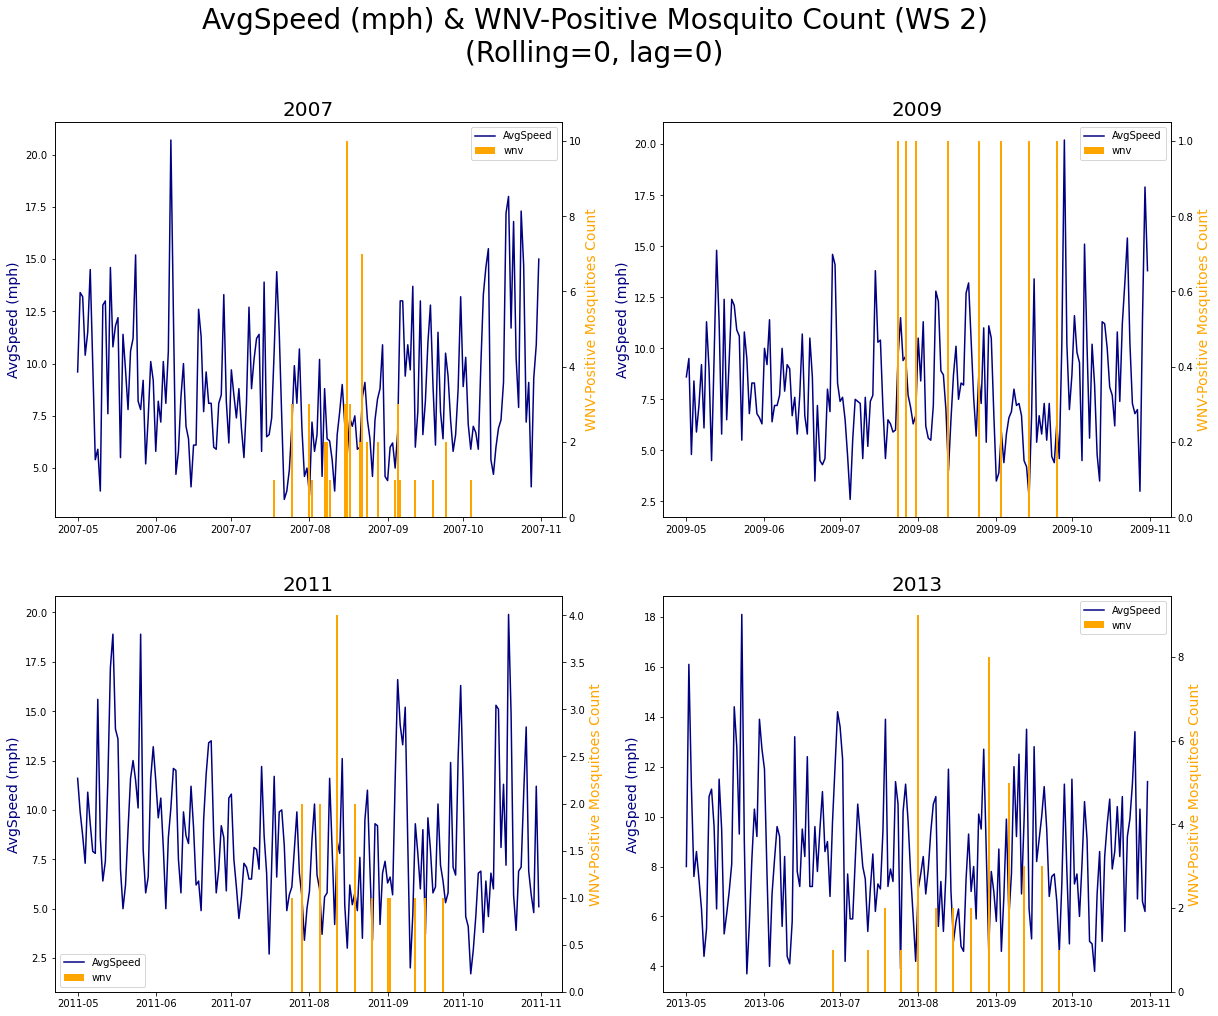

In [27]:
year_list = [2007, 2009, 2011, 2013]

fig, ax = plt.subplots(2,2,figsize=(20,16))

for idx, df in enumerate(year_list):
    row_idx = int(idx/2)
    col_idx = idx%2
    year = year_list[idx]
    
    ax1 = ax[row_idx, col_idx]
    ax1.set_title(f"{year}", fontsize=20)
    ax1.plot(weather_s2[weather_s2.index.year == year]['avgspeed'], c="navy", label='AvgSpeed')
    ax1.set_ylabel("AvgSpeed (mph)", fontsize=14, color='navy')
    
    ax2 = ax1.twinx()
    ax2.bar(x=df_train[df_train.index.year == year].index, height=df_train[df_train.index.year == df]["wnv"], color="orange", label='wnv')
    ax2.set_xlabel("Month", fontsize=14)
    ax2.set_ylabel("WNV-Positive Mosquitoes Count", fontsize=14, color='orange')
    
    show_legend(ax1, ax2)
    
plt.suptitle("AvgSpeed (mph) & WNV-Positive Mosquito Count (WS 2)\n(Rolling=0, lag=0)", fontsize=28,va ='top')
plt.show()

For average wind speeds, we did not include the rolling average or time lags as the effect of wind speed is immediate. 

Lower average wind speeds show a larger number of WNV-positive mosquitoes being detected. Wind patterns have been touted as a possible contributer to the WNV spreading as wind can be used as a form of migration by mosquitoes. Thus, it is likely that fewer mosquitoes are detected when wind speeds are higher, and they are only detected by traps during lower wind speeds

###  Categorical Variables (Weather Conditions)

The weather data includes weather conditions such as rain, haze, fog etc. In this section, we will determine the effect of weather phenomena on the presence of WNV. 

We will roll and lag the weather conditions data to determine if there is an onset of WNV a certain duration after the weather phenomena.

<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

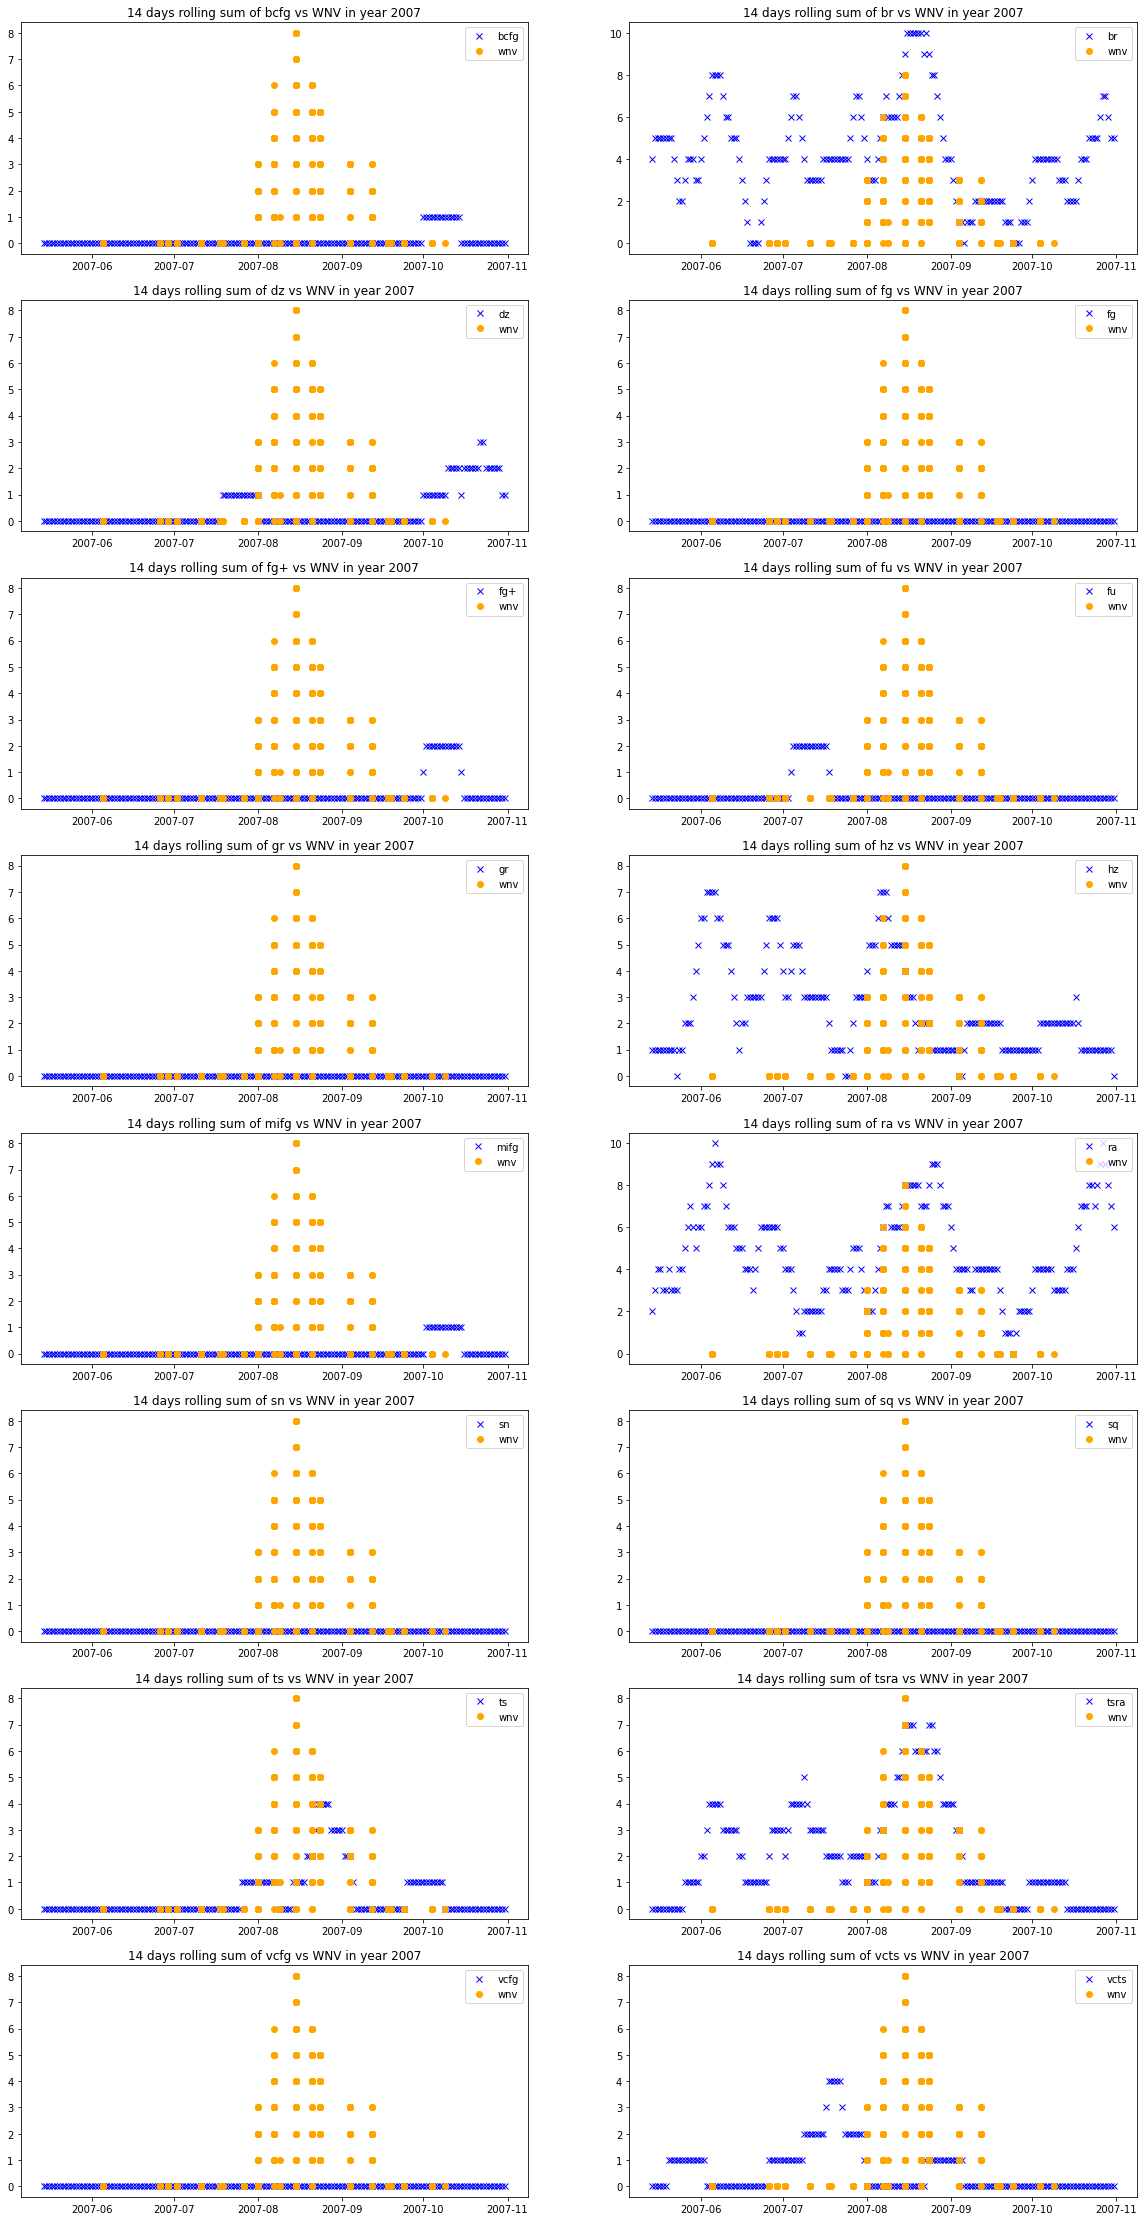

In [28]:
# Plot rolling sum of all weather conditions vs presence of WNV
weather_conditions = ['bcfg','br','dz','fg','fg+','fu','gr','hz','mifg','ra','sn','sq','ts','tsra','vcfg','vcts']

def plot_weather_vs_wnv_rolling(weather_station, station_number, year, roll_days):
    plt.figure(figsize=(20, 40))
    for i in range(len(weather_conditions)):
        plt.subplot(8, 2, i+1)
        plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
        plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
        plt.title(f'{roll_days} days rolling sum of {weather_conditions[i]} vs WNV in year {year}')
        plt.legend(loc='upper right')

# Plot 14 day rolling sum of weather conditions of station 1 in 2007
plot_weather_vs_wnv_rolling(weather_s1, 1, '2007', 14)

<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

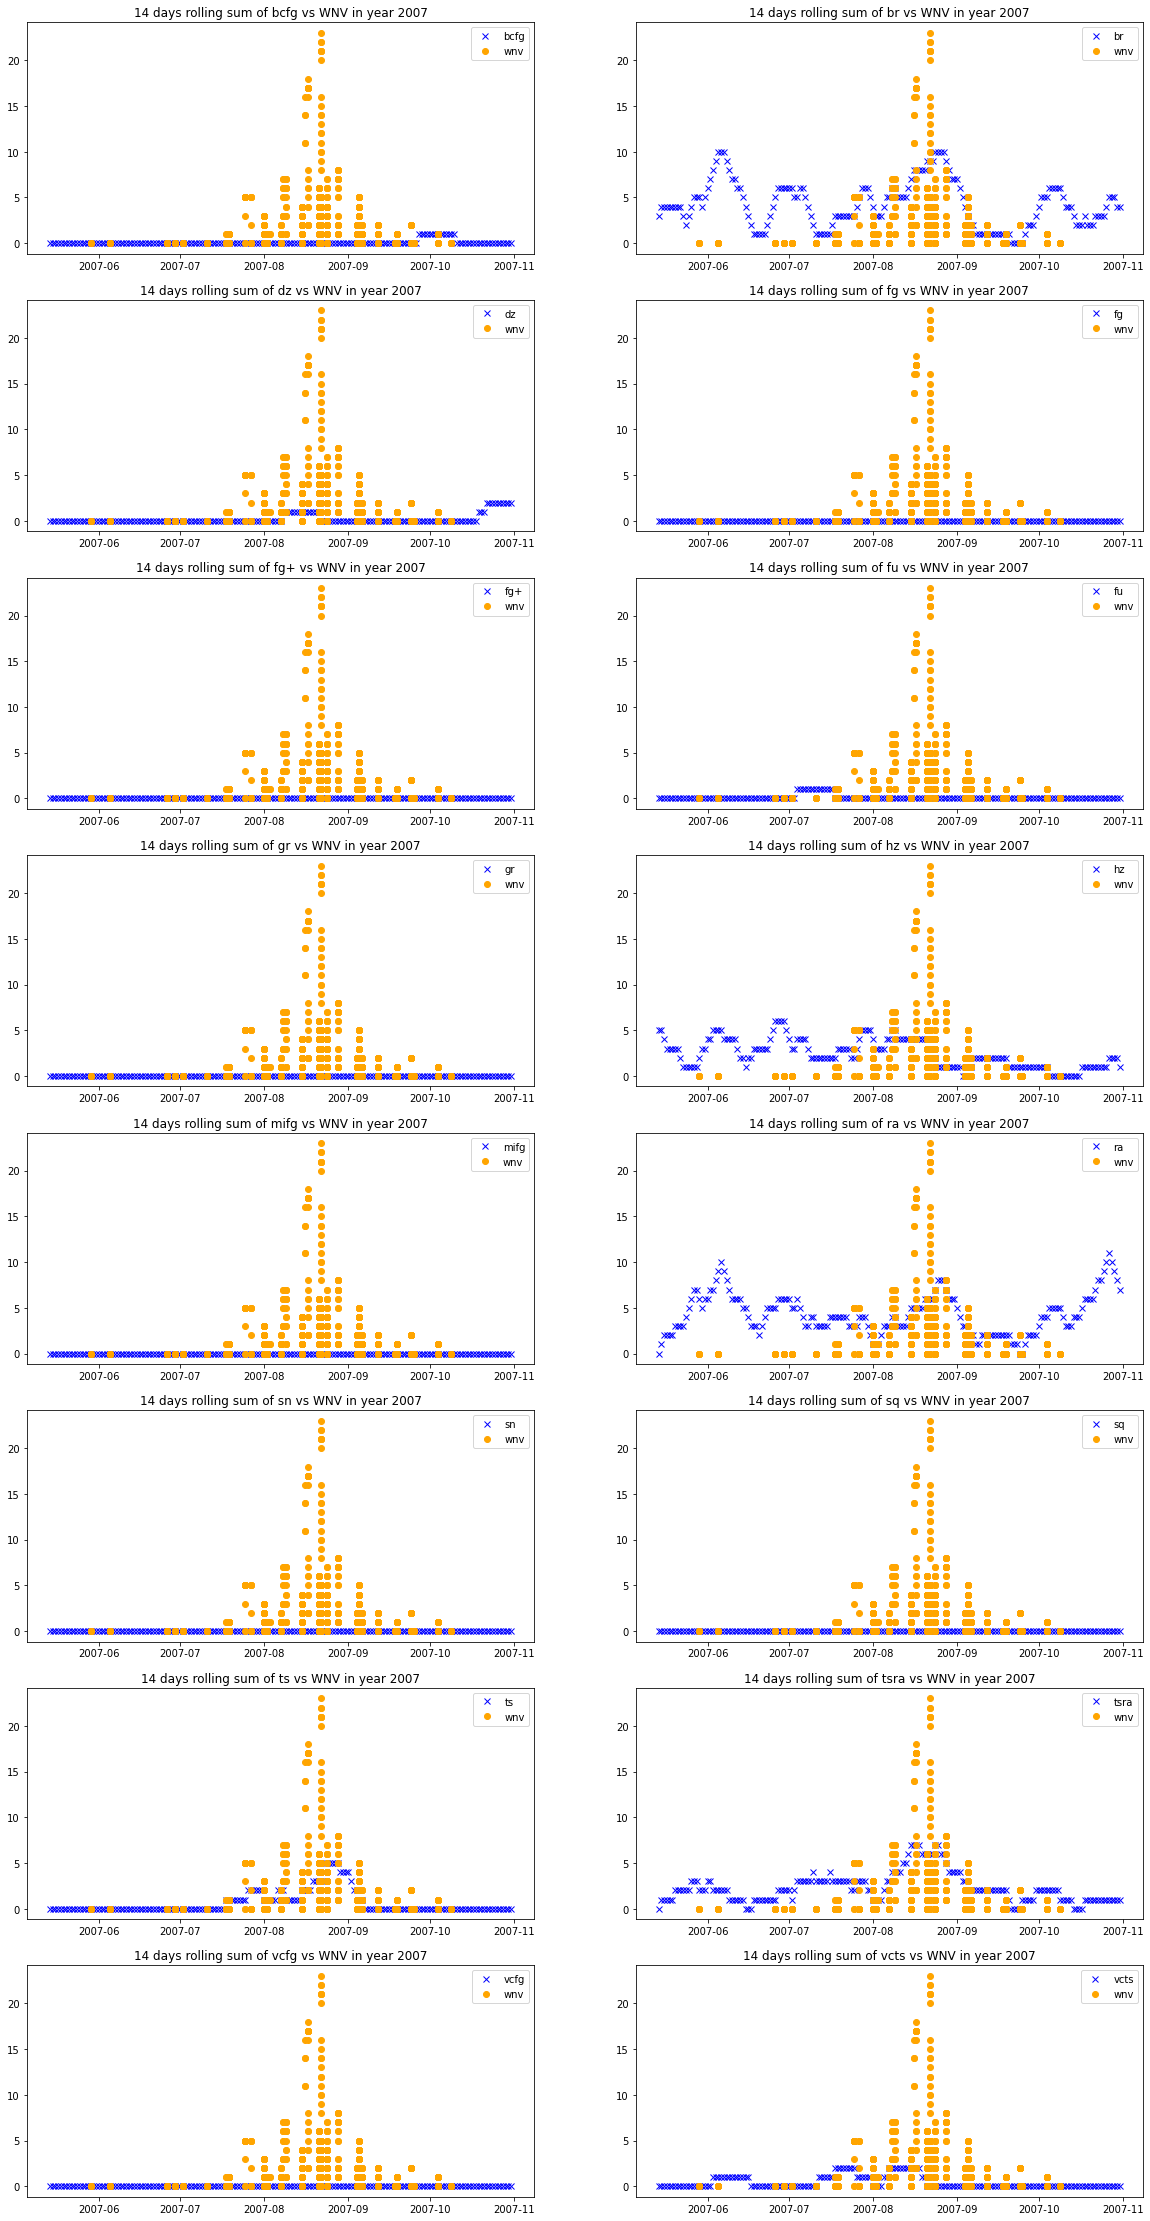

In [29]:
# Plot 14 day rolling sum of weather conditions of station 2 in 2007
plot_weather_vs_wnv_rolling(weather_s2, 2, '2007', 14)

From the above plots, it seems like **weather conditions associated with rain: ts, tsra, vcts, ra, br, hz** could possibly be correlated to presence of WNV. 

Remove other weather conditions and plot for 2011 below.

In [30]:
# Plot only rain-related weather conditions
weather_conditions = ['br','hz','ra','ts','tsra','vcts']

<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

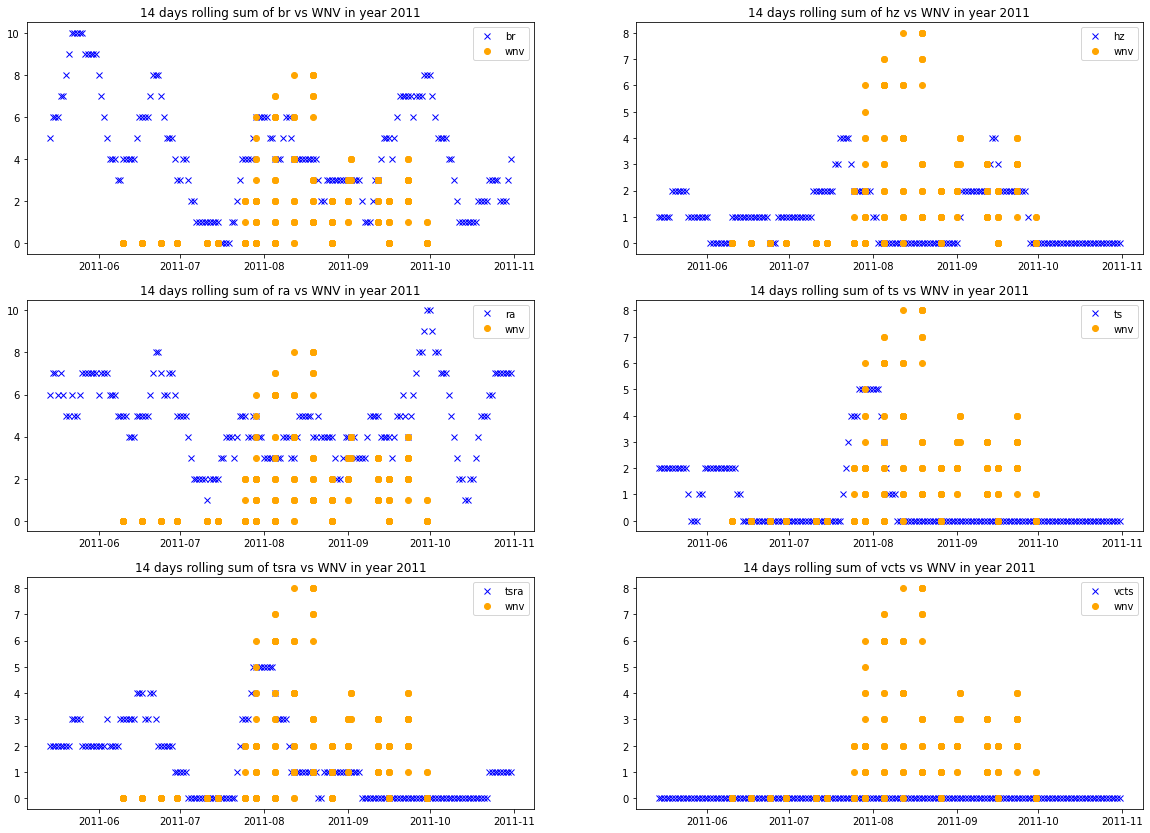

In [31]:
plot_weather_vs_wnv_rolling(weather_s1, 1, '2011', 14)

<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(weather_station[year][weather_conditions[i]].rolling(roll_days).sum(), 'x',  c="blue", label=weather_conditions[i]);
<ipython-input-28-87a83aff91da>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(df_train.loc[df_train['station'] == station_number][year]['wnv'].rolling(roll_days).sum(), 'o', c="orange",label='wnv');
<ipython-input-28-87a83aff91da>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` inste

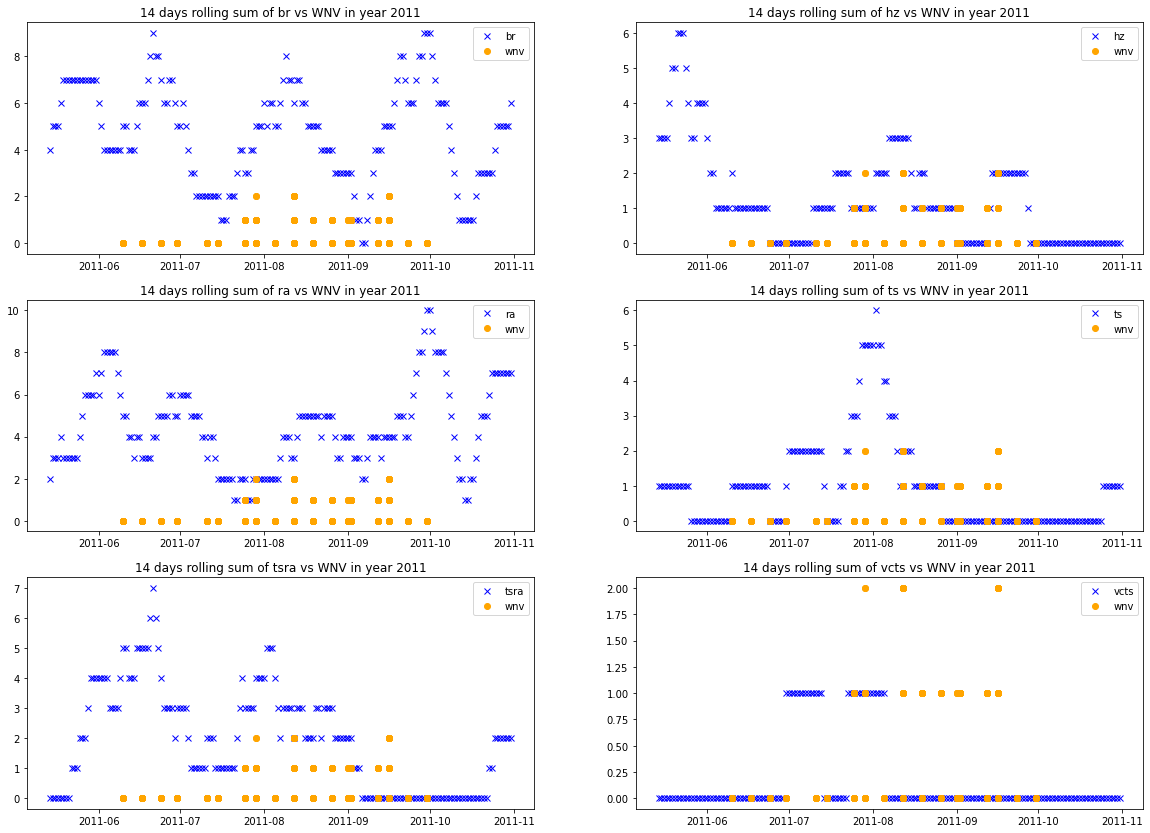

In [32]:
plot_weather_vs_wnv_rolling(weather_s2, 2, '2011', 14)

As shown above, the 14 day rolling sums of the rain-associated weather conditions appear to coincide with the emergence of the WNV. Thus, we will use the rolling sum of **weather conditions associated with rain** in our modelling.